# Project Country Data

## Importing neccesry libraries

In [1]:
import sys
import joblib
sys.modules['sklearn.externals.joblib']=joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import FastICA as ICA
from scipy.cluster.hierarchy import dendrogram, linkage as hc_linkage
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.metrics import silhouette_score as sscore, calinski_harabasz_score as chscore, davies_bouldin_score as dbscore
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
country_df = pd.read_csv("https://raw.githubusercontent.com/SameerSharma-57/Country_data_project/main/Country-data.csv?token=GHSAT0AAAAAACAV5LB6UMBHOHJKBVKZKPEMZBFNONQ")
country_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

## Preprocessing

In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

So there are no NULL values in the dataset

## Scaling the data 

In [6]:
#Seperating Dataset from the country names
X = country_df.copy()
Y = X["country"]
X = X.drop("country" ,axis = 1)

#Scaling the Dataset X using Standard Scalar
X_scale = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns = X.columns)
X_scale

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

## Vizualizing the data

<Axes: ylabel='Density'>

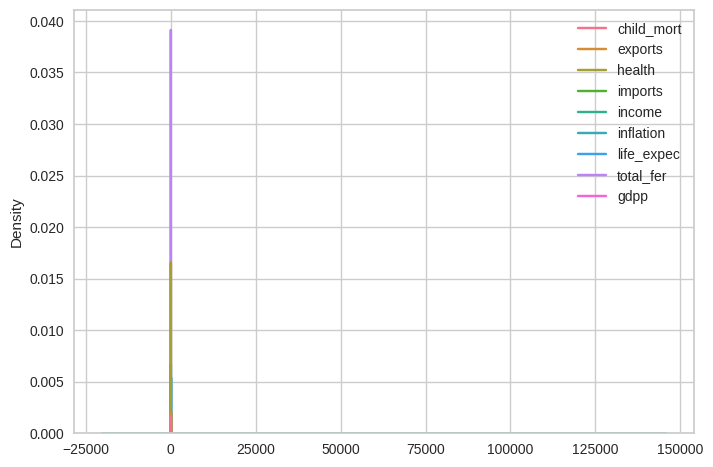

In [7]:
#kde Plot of unscaled Data
sns.kdeplot(data=X)

<Axes: ylabel='Density'>

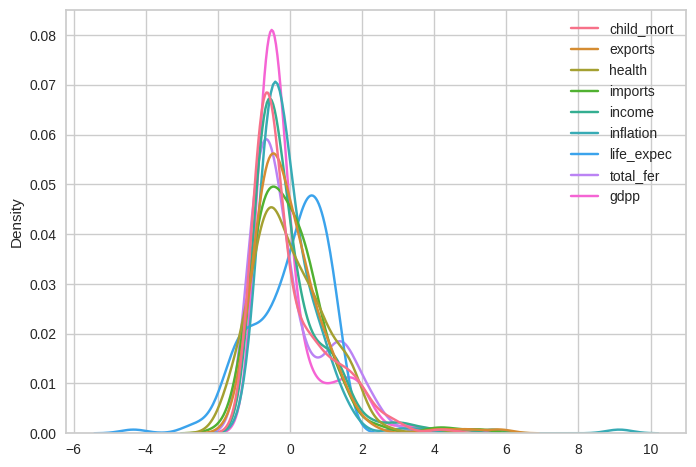

In [8]:
#kde Plot of Scaled Data
sns.kdeplot(data=X_scale)

As we can see that for unscaled data, some features are dominating on the density plot while otheres are not getting proper representation. In case of Scaled Data, we can see scaled plots where each feature is given equal representation.

[Text(0.5, 47.7222222222222, ''), Text(58.222222222222214, 0.5, '')]

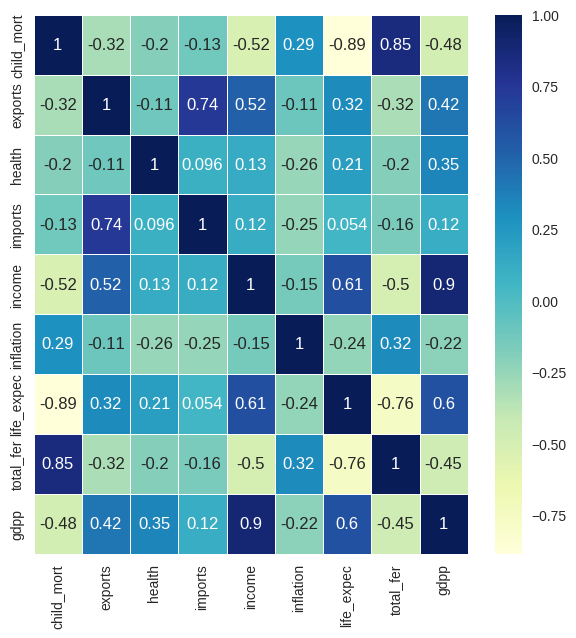

In [9]:
#Correlation heatmap for the data
plt.rcParams["figure.figsize"] = (7,7)
ax = sns.heatmap(data = X.corr(),annot = True,cmap ='YlGnBu',linewidth=.5)
ax.set(xlabel="", ylabel="")

From heatmap, we can infer that life expectency is strictly inversly proportional to total fertility and child mortality while directly proportional to income. Thus child mortality and total fertility are directly proportional to each other. Exports are directly proportional to income and imports. income is directly proportional to life expectancy, exports while inversly proportional to child mortality. As we can see that income and gdpp are highly positivly correlated, we can infer that countries with higher income, exports and imports usually have higher gdpp which tends to better life expectancy.

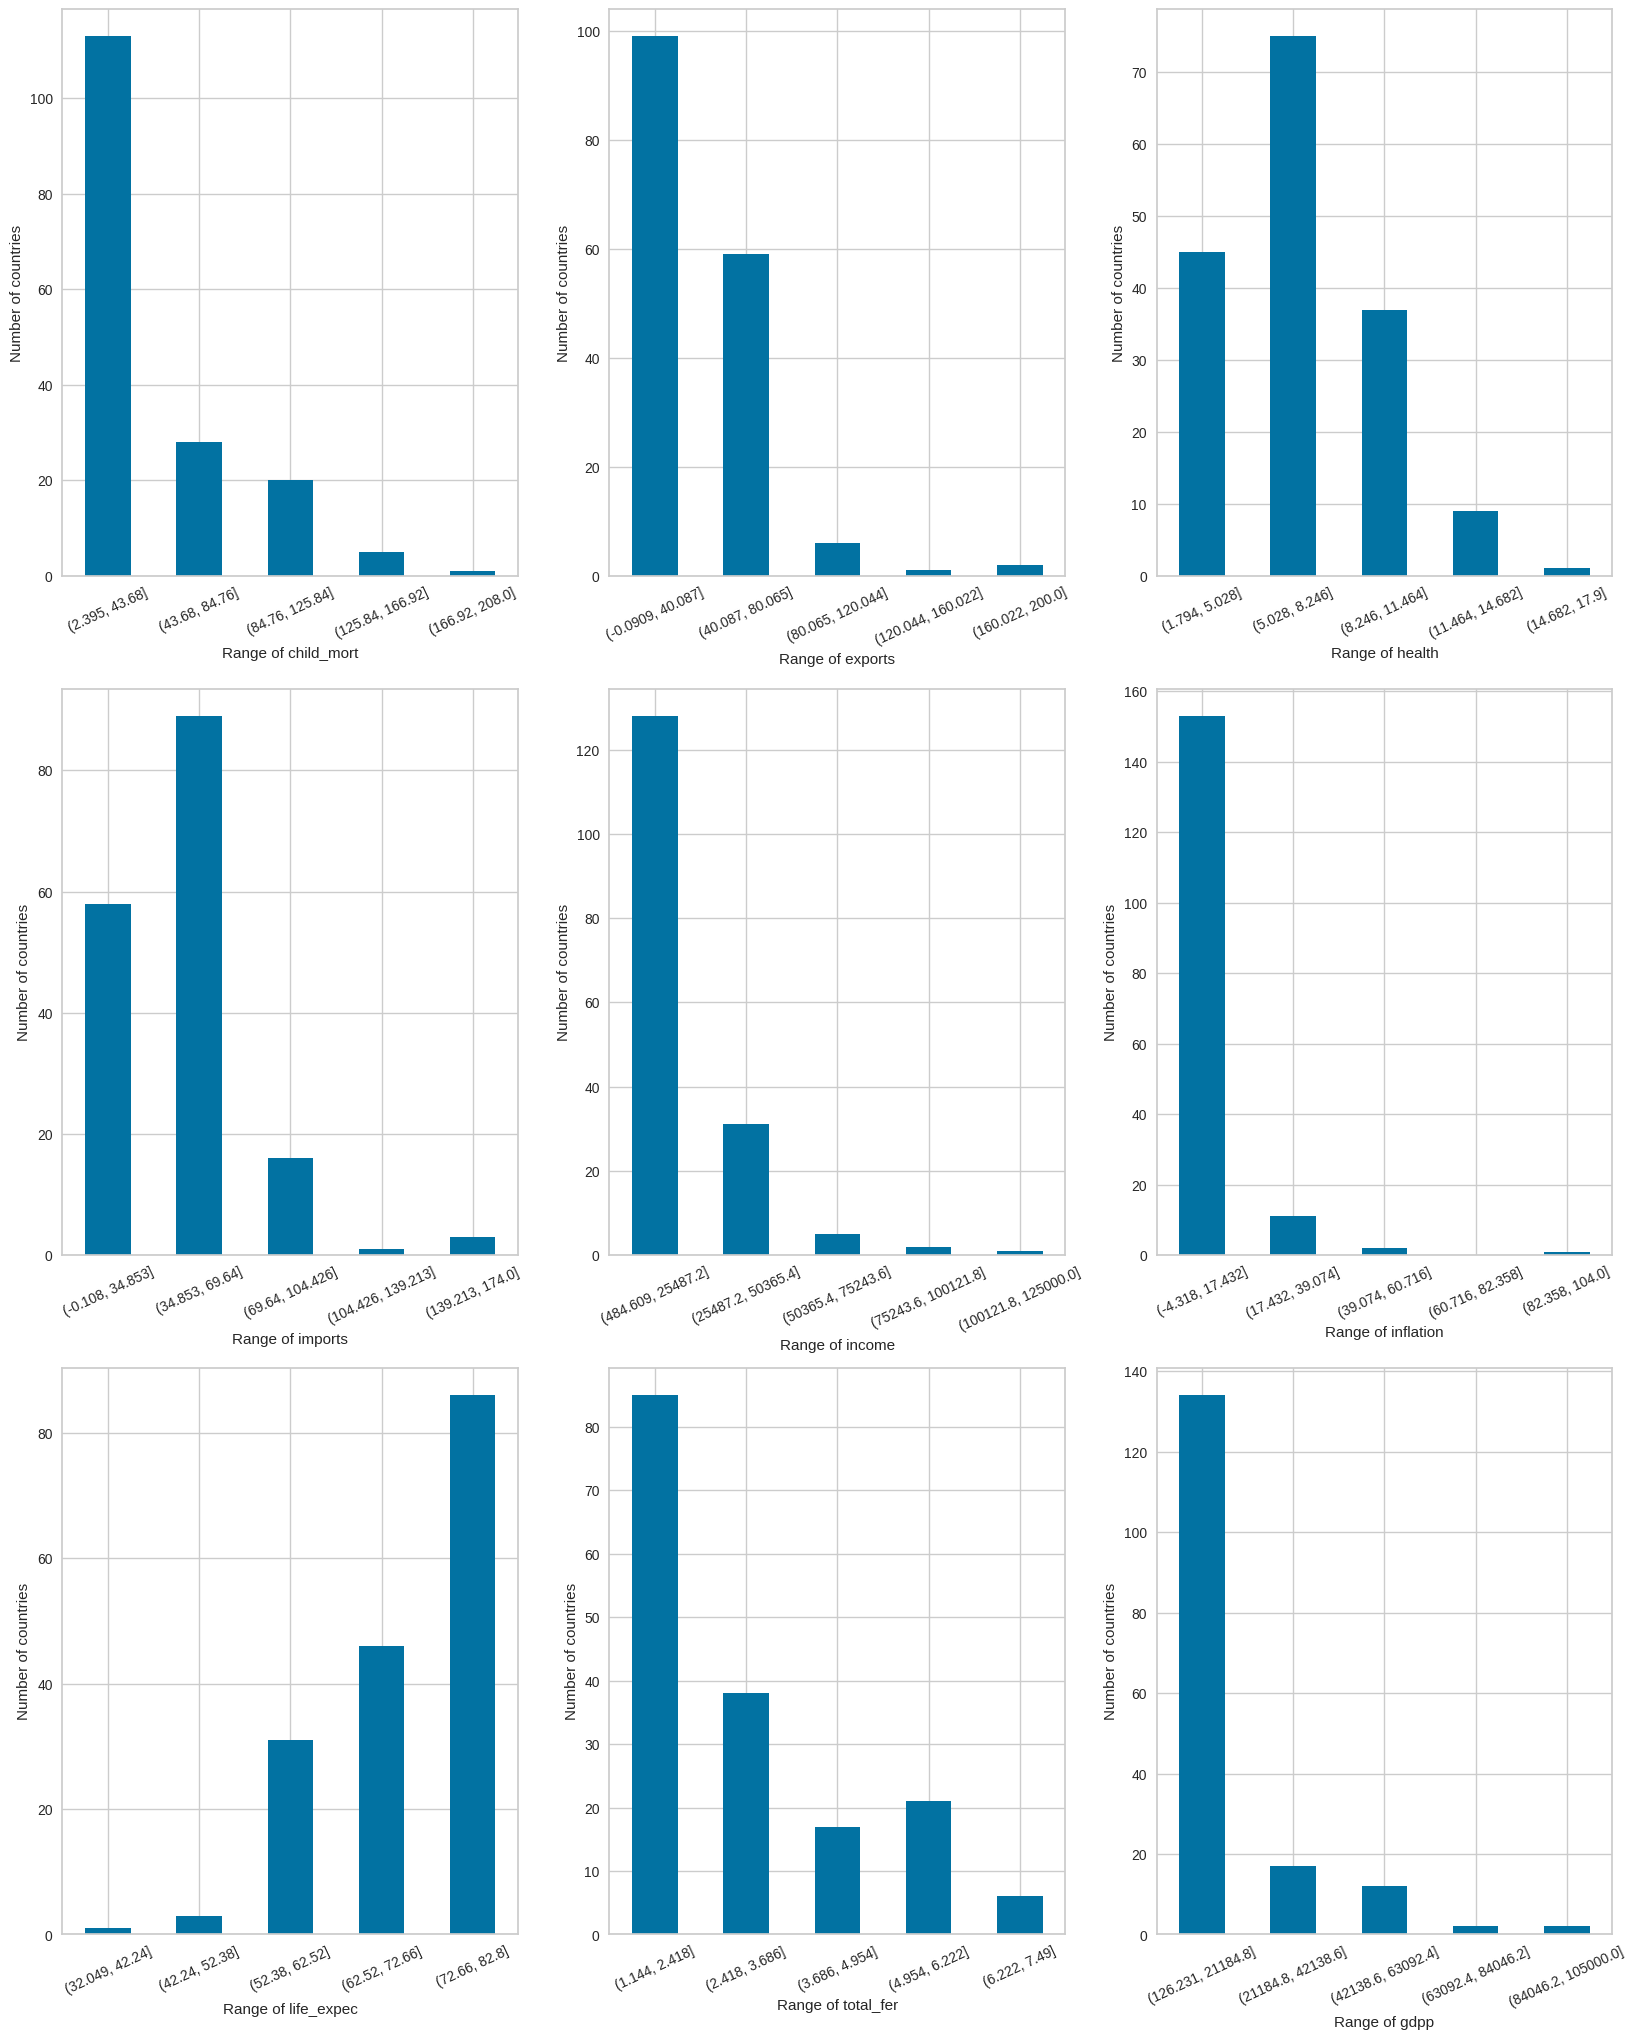

In [10]:
#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X.columns:
    temp = pd.cut(x = country_df[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

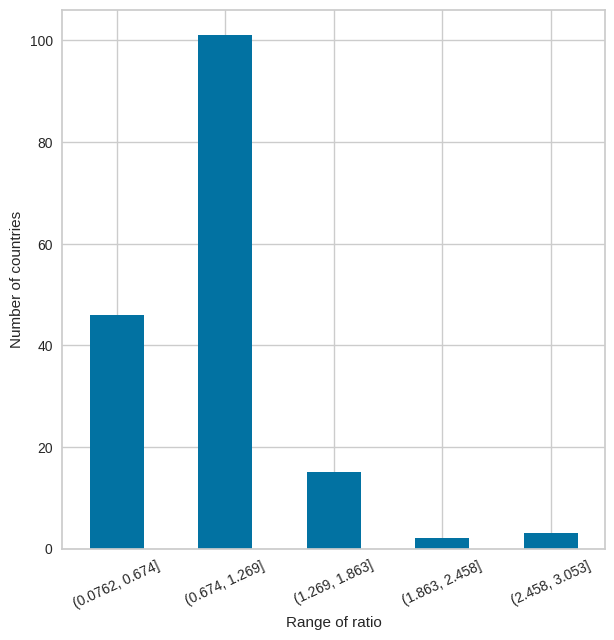

In [11]:
#Calculating export import ratio for countries
new_Da = country_df.copy()
new_Da["ratio"] = country_df["exports"]/country_df["imports"]
temp = pd.cut(x = new_Da["ratio"],bins = 5)
bin_counts = temp.value_counts().sort_index()
plt.xlabel("Range of ratio")
plt.ylabel("Number of countries")
bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

From the above plot we can infer that around 50% of the countries have equal amount of exports and imports showing their developing nature. Countries with less exports but higher imports shows their underdeveloped nature as depicted by the range of ratio (0.0762,0.674]. There are some countries showing their developed nature with higher export import ratio (>1).

## Vizualize the scaled data

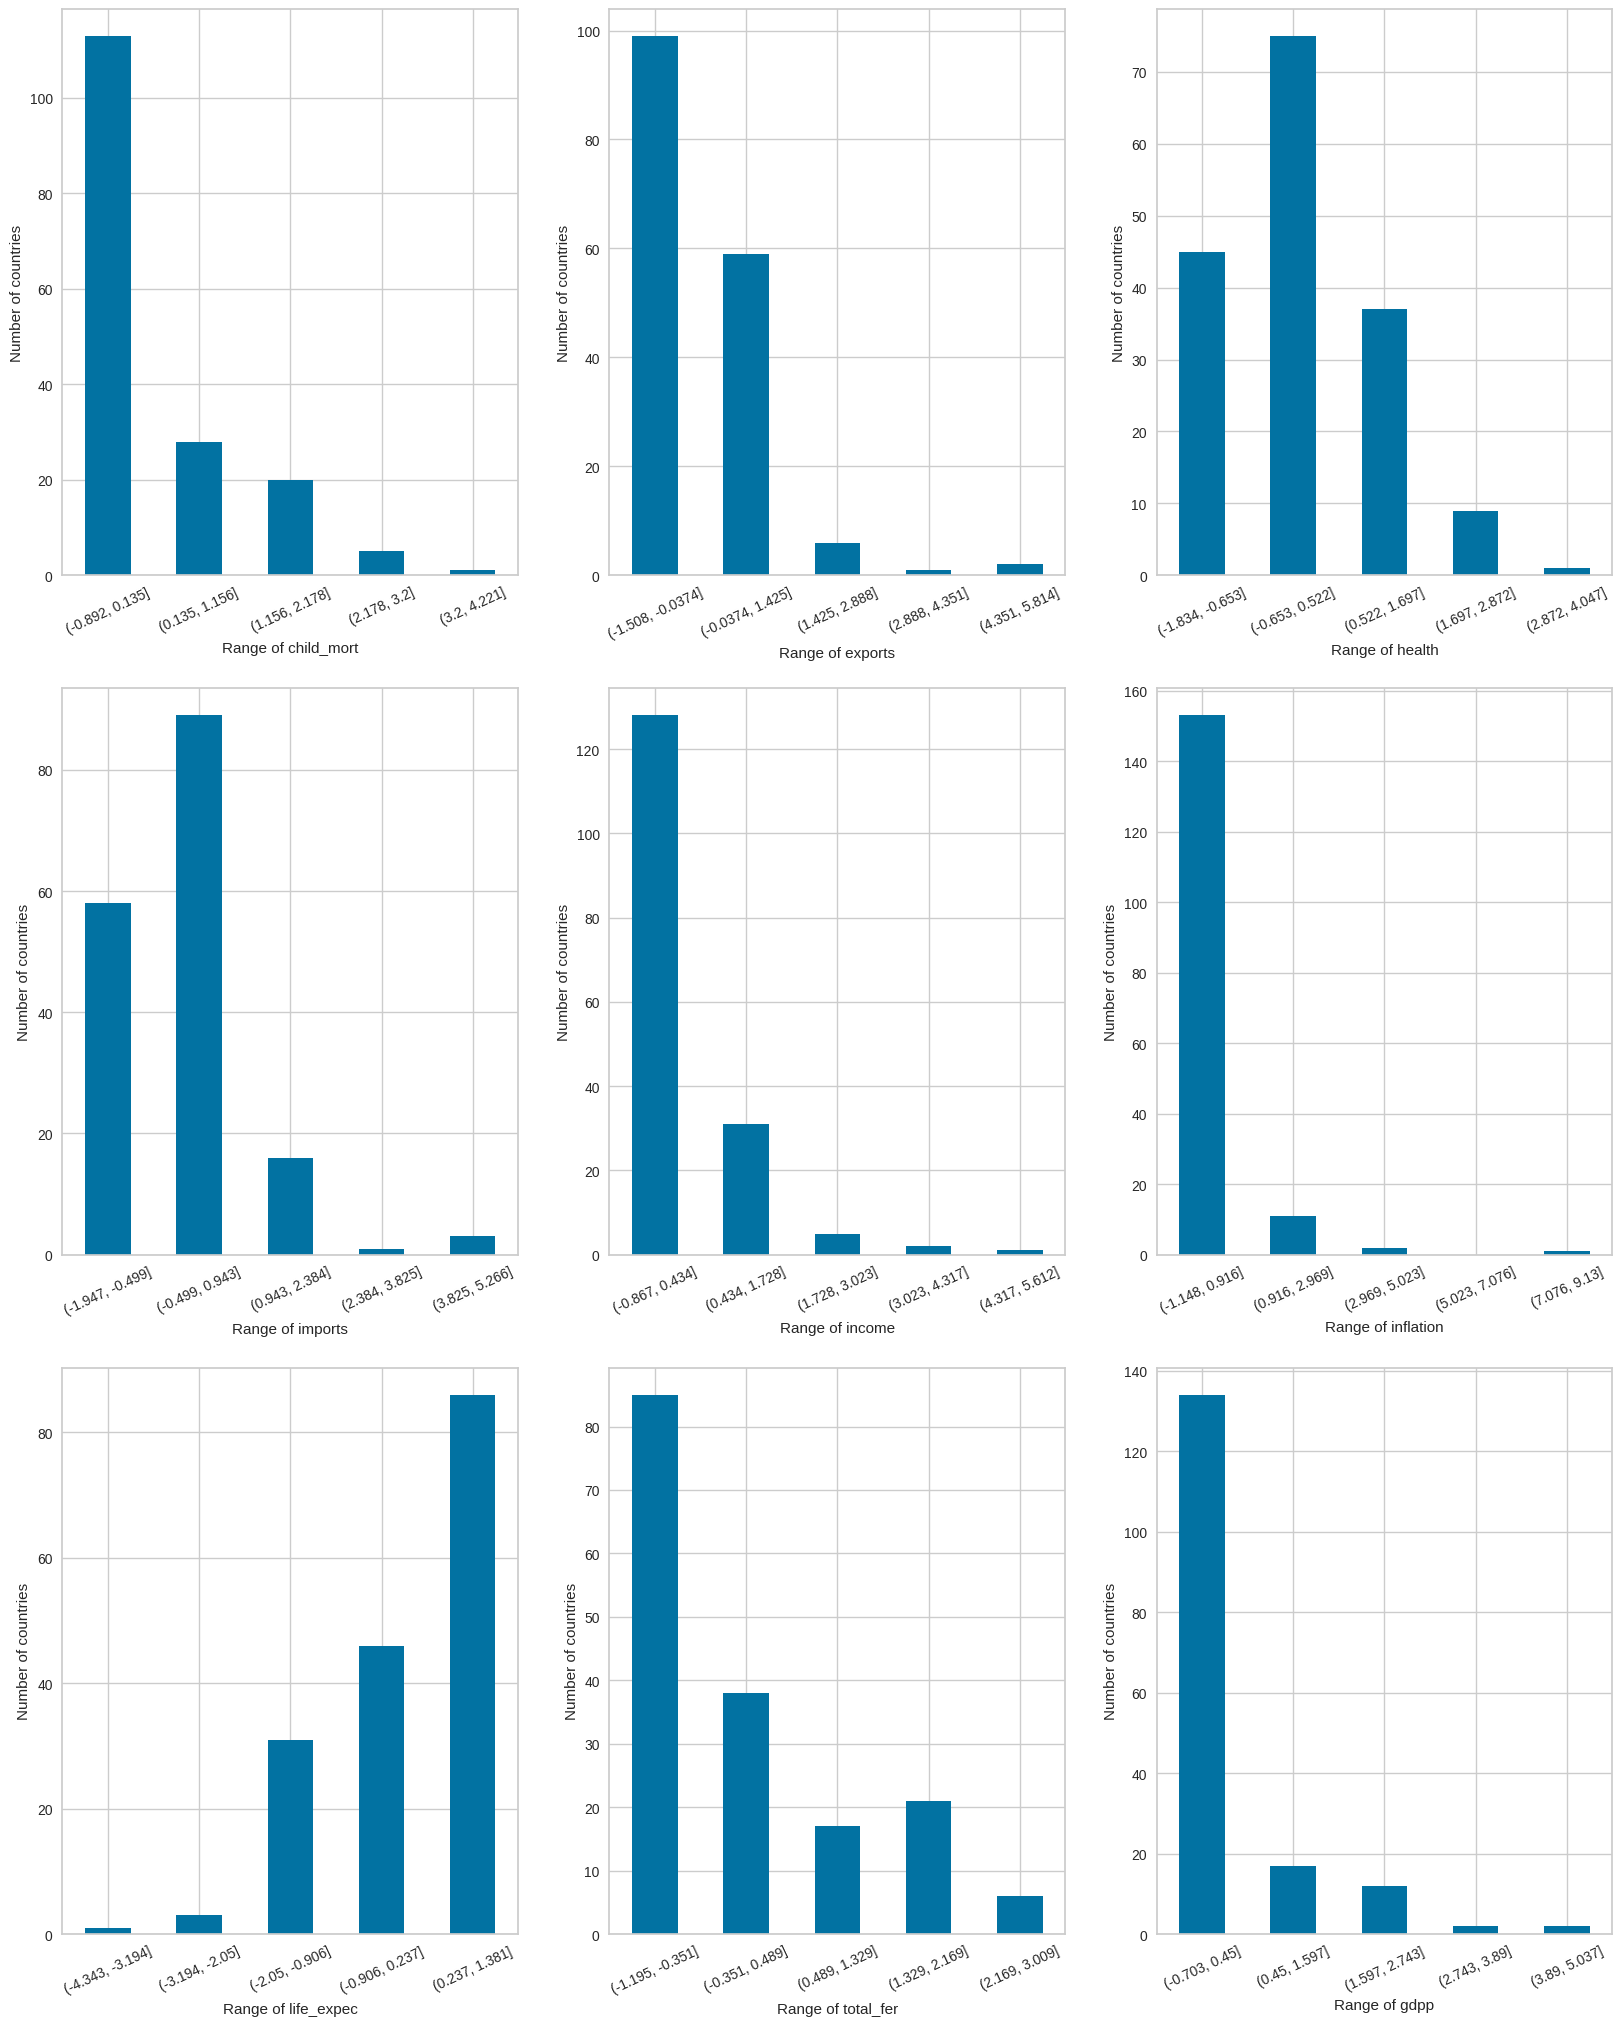

In [12]:
#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X_scale.columns[0:10]:
    temp = pd.cut(x = X_scale[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

## Selecting essential features using PCA

In [13]:
#Using pca to select essential features which we will use later to fit the models.
pca = PCA()
pca.fit(X_scale)

PCA()

In [14]:
#Calculating explained variance ratio of different features in dataset
expalined_variance_ratio=pca.explained_variance_ratio_

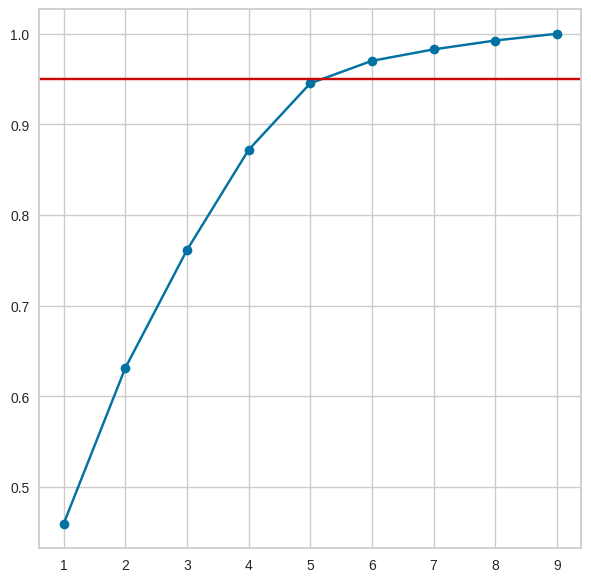

In [15]:
#Plotting the explained variance ratio to get n_components
cumulative_variance_ratio=np.cumsum(expalined_variance_ratio)
plt.plot(np.arange(1,10),cumulative_variance_ratio,marker='o')
plt.axhline(y=0.95,color='r')

From the plot, we can infer that for around 95% of variance, we should take n_components=5

## Transforming Data

In [16]:
#Transforming the dataset to n_components = 5 using pca
pca=PCA(n_components=5)
pca.fit(X_scale)
X_transform=pca.transform(X_scale)
X_transform=pd.DataFrame(X_transform,columns=["PC"+str(i) for i in np.arange(1,6)])
X_transform


PC1       PC2       PC3       PC4       PC5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

## K_means clustering

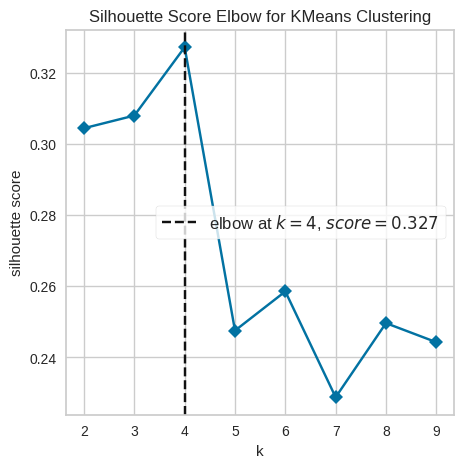

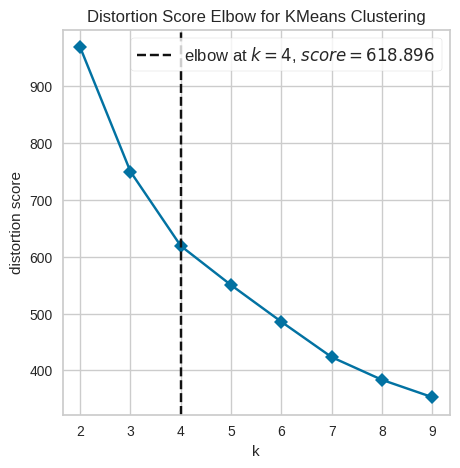

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
#Using elbow method to calculate optimal number of clusters
plt.rcParams['figure.figsize']=(5,5)
kmeans_clf = KMeans()

#elbow method by using Silhouette score
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),metric='silhouette',timings=False)
visualizer.fit(X_transform)
visualizer.show()

#elbow method by using distortion score
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),timings=False)
visualizer.fit(X_transform)
visualizer.show()

From the plots, we can infer that optimal number of cluster for KMeans is four

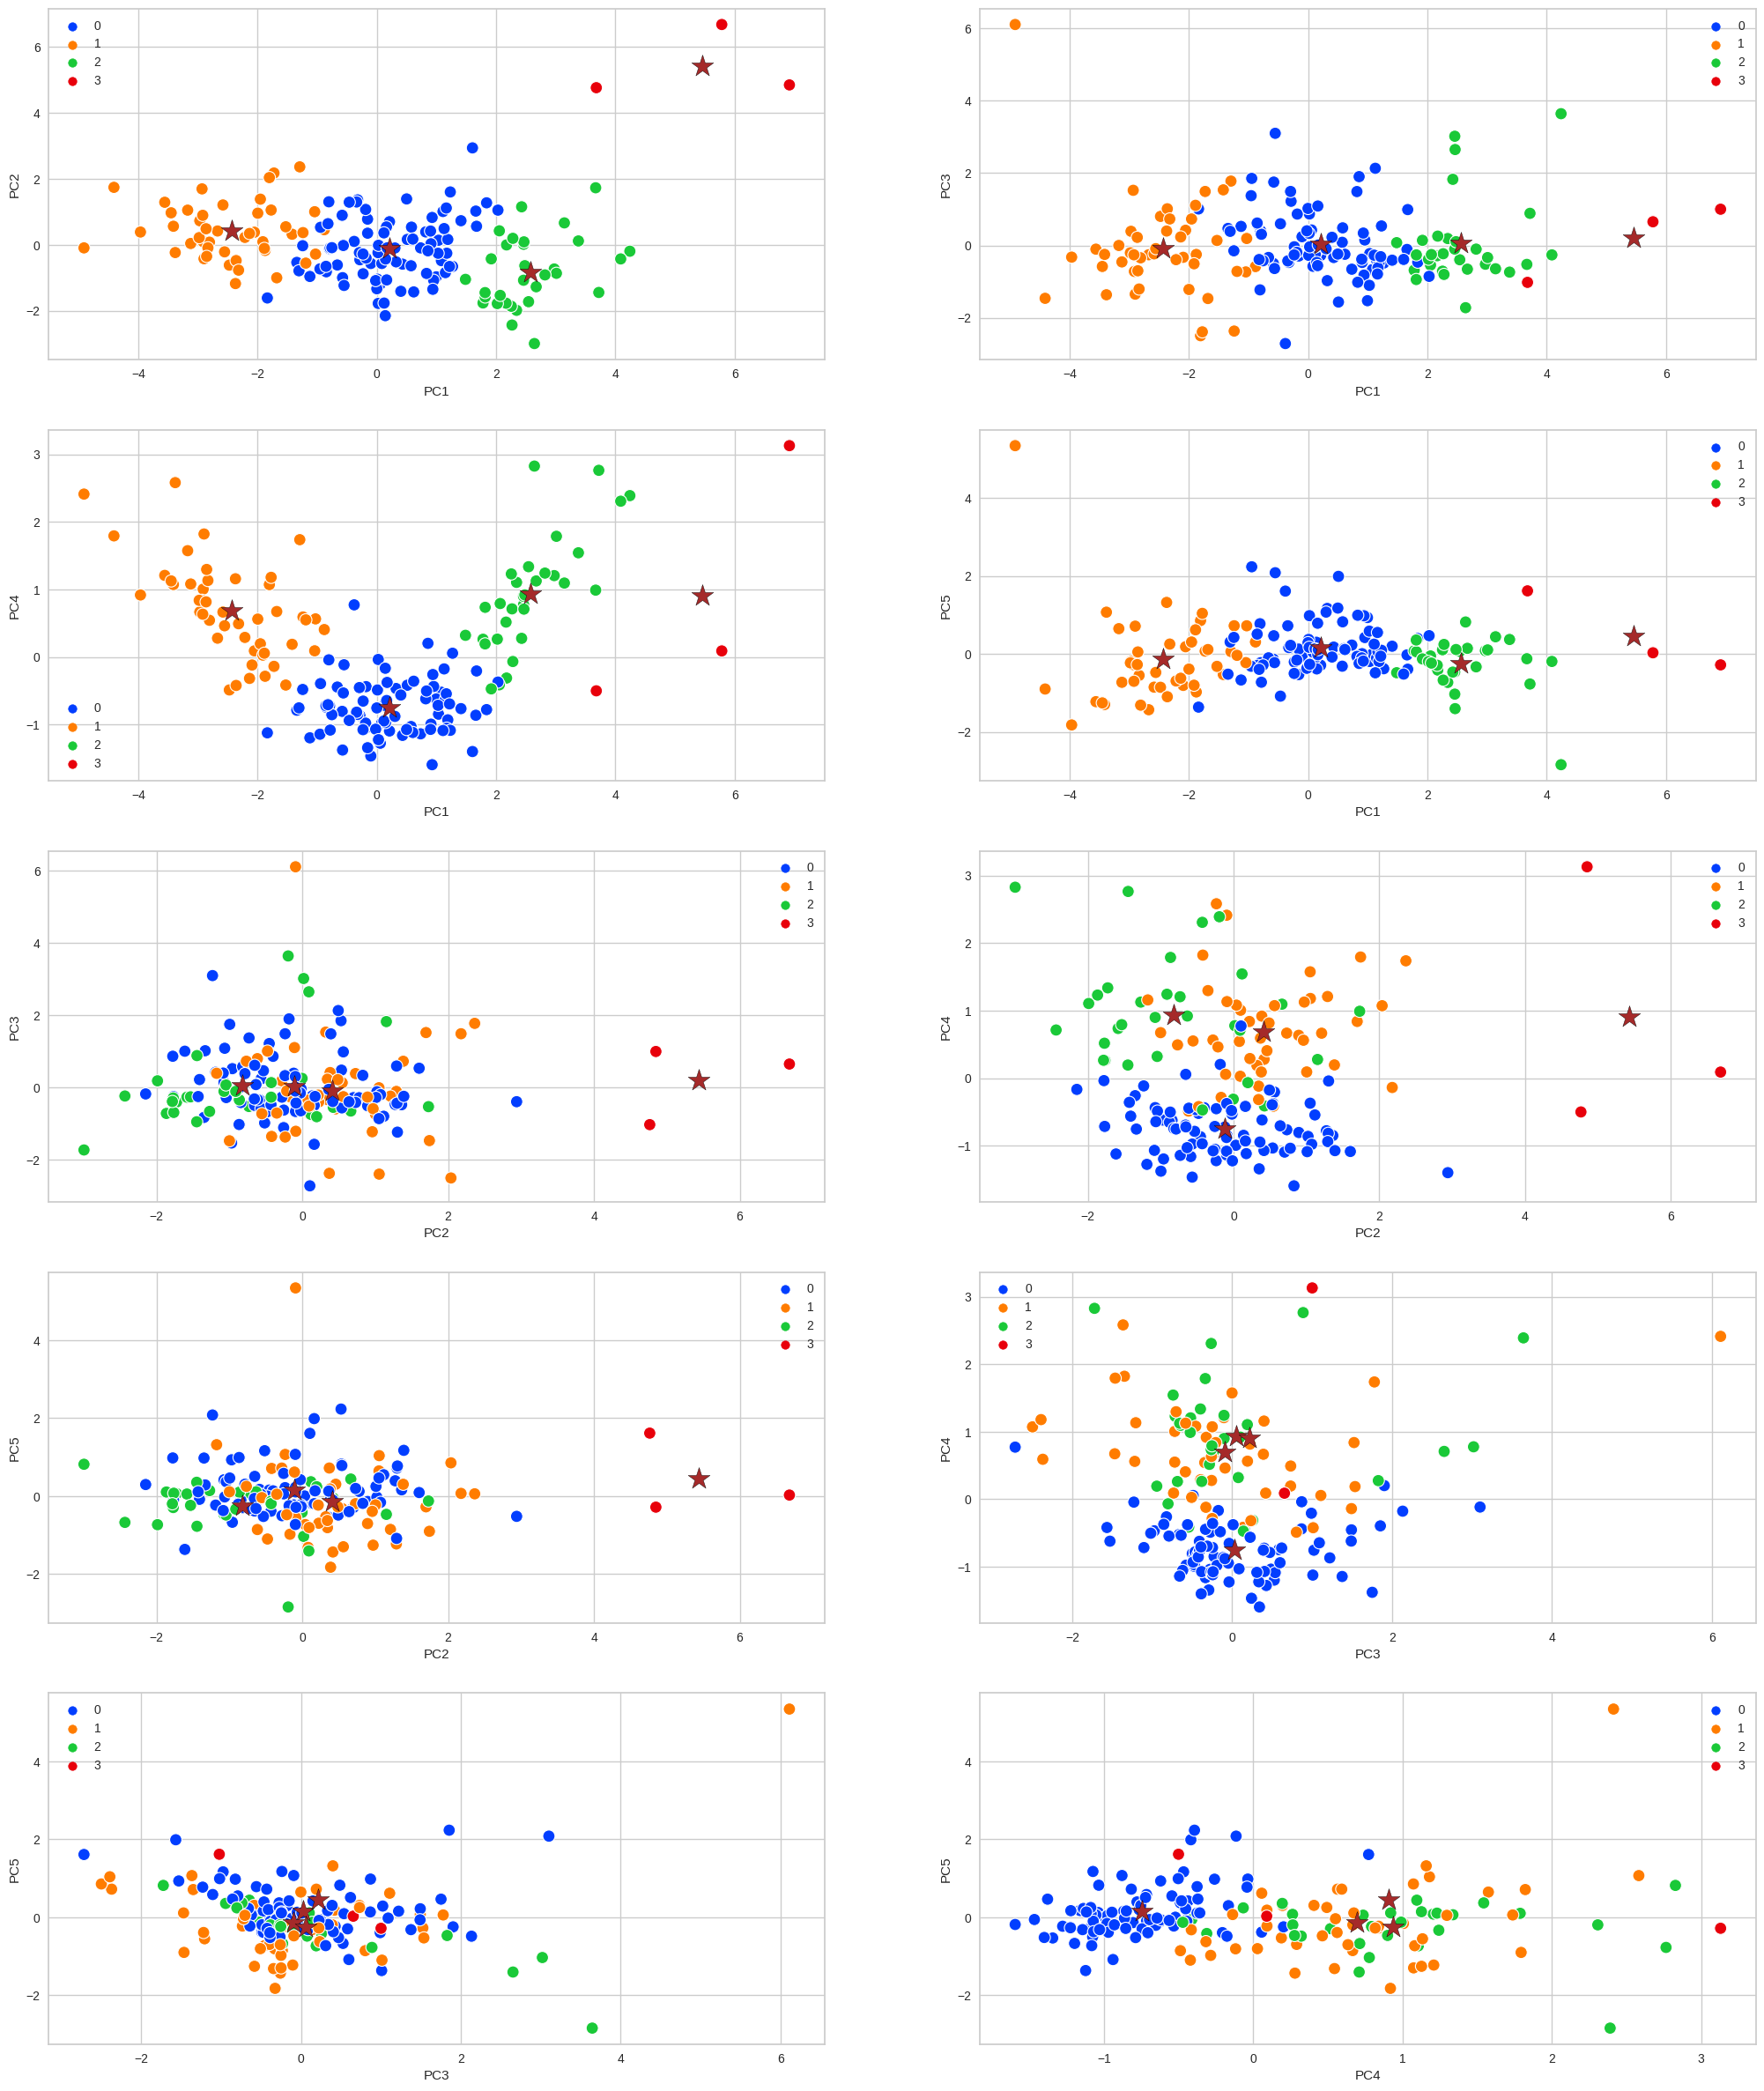

In [18]:
#Assigning cluster labels to datapoints using KMeans
models_kmeans = KMeans(n_clusters = 4)
clusters = models_kmeans.fit_predict(X_transform)

#Plotting the clusters with the datapoints and centroids
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns

#Centroids
centroids_kmeans = models_kmeans.cluster_centers_

for j in range(len(cols)):
  for k in range(j,len(cols)):
    #We do not want to plot for same feature vs same feature
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      #Plotting cluster
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = clusters,palette='bright',ax= ax,s = 100,alpha = 1)
      #PLotting centroids
      ax.scatter(centroids_kmeans[:,j],centroids_kmeans[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black')
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

From the plots, we can infer that PC1 and PC2 are seperating the clusters very effectively while other features are not performing well

In [19]:
#Storing the cluster labels we got from KMeans into a numpy array
country_labels_kmeans = models_kmeans.labels_
country_labels_kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [20]:
#Calculating percentage of points in each clusters
unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 86	51.50%
Class 1: 47	28.14%
Class 2: 31	18.56%
Class 3: 3	1.80%



## Gaussian Clustering

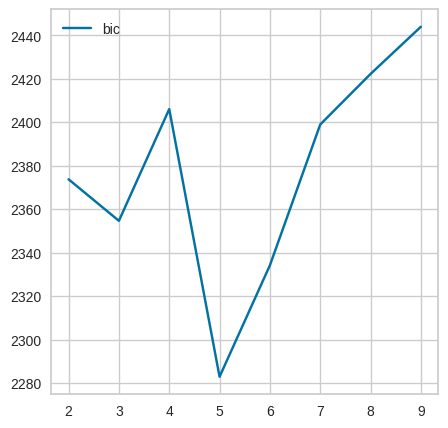

5

In [21]:
#Calculating optimal value for n_components for Gaussian mixture by minimizing the BIC(Bayessian information criterion)
bic = []
for n in range(2,10):
    temp = GaussianMixture(n_components=n)
    temp.fit(X_transform)
    bic.append(temp.bic(X_transform))
plt.plot(range(2,10),bic,label = 'bic')
plt.legend()
plt.show()
k = (bic.index(min(bic)) + 2)
k

So optimal value of n_components for Gaussian mixture is 4 same as KMeans model

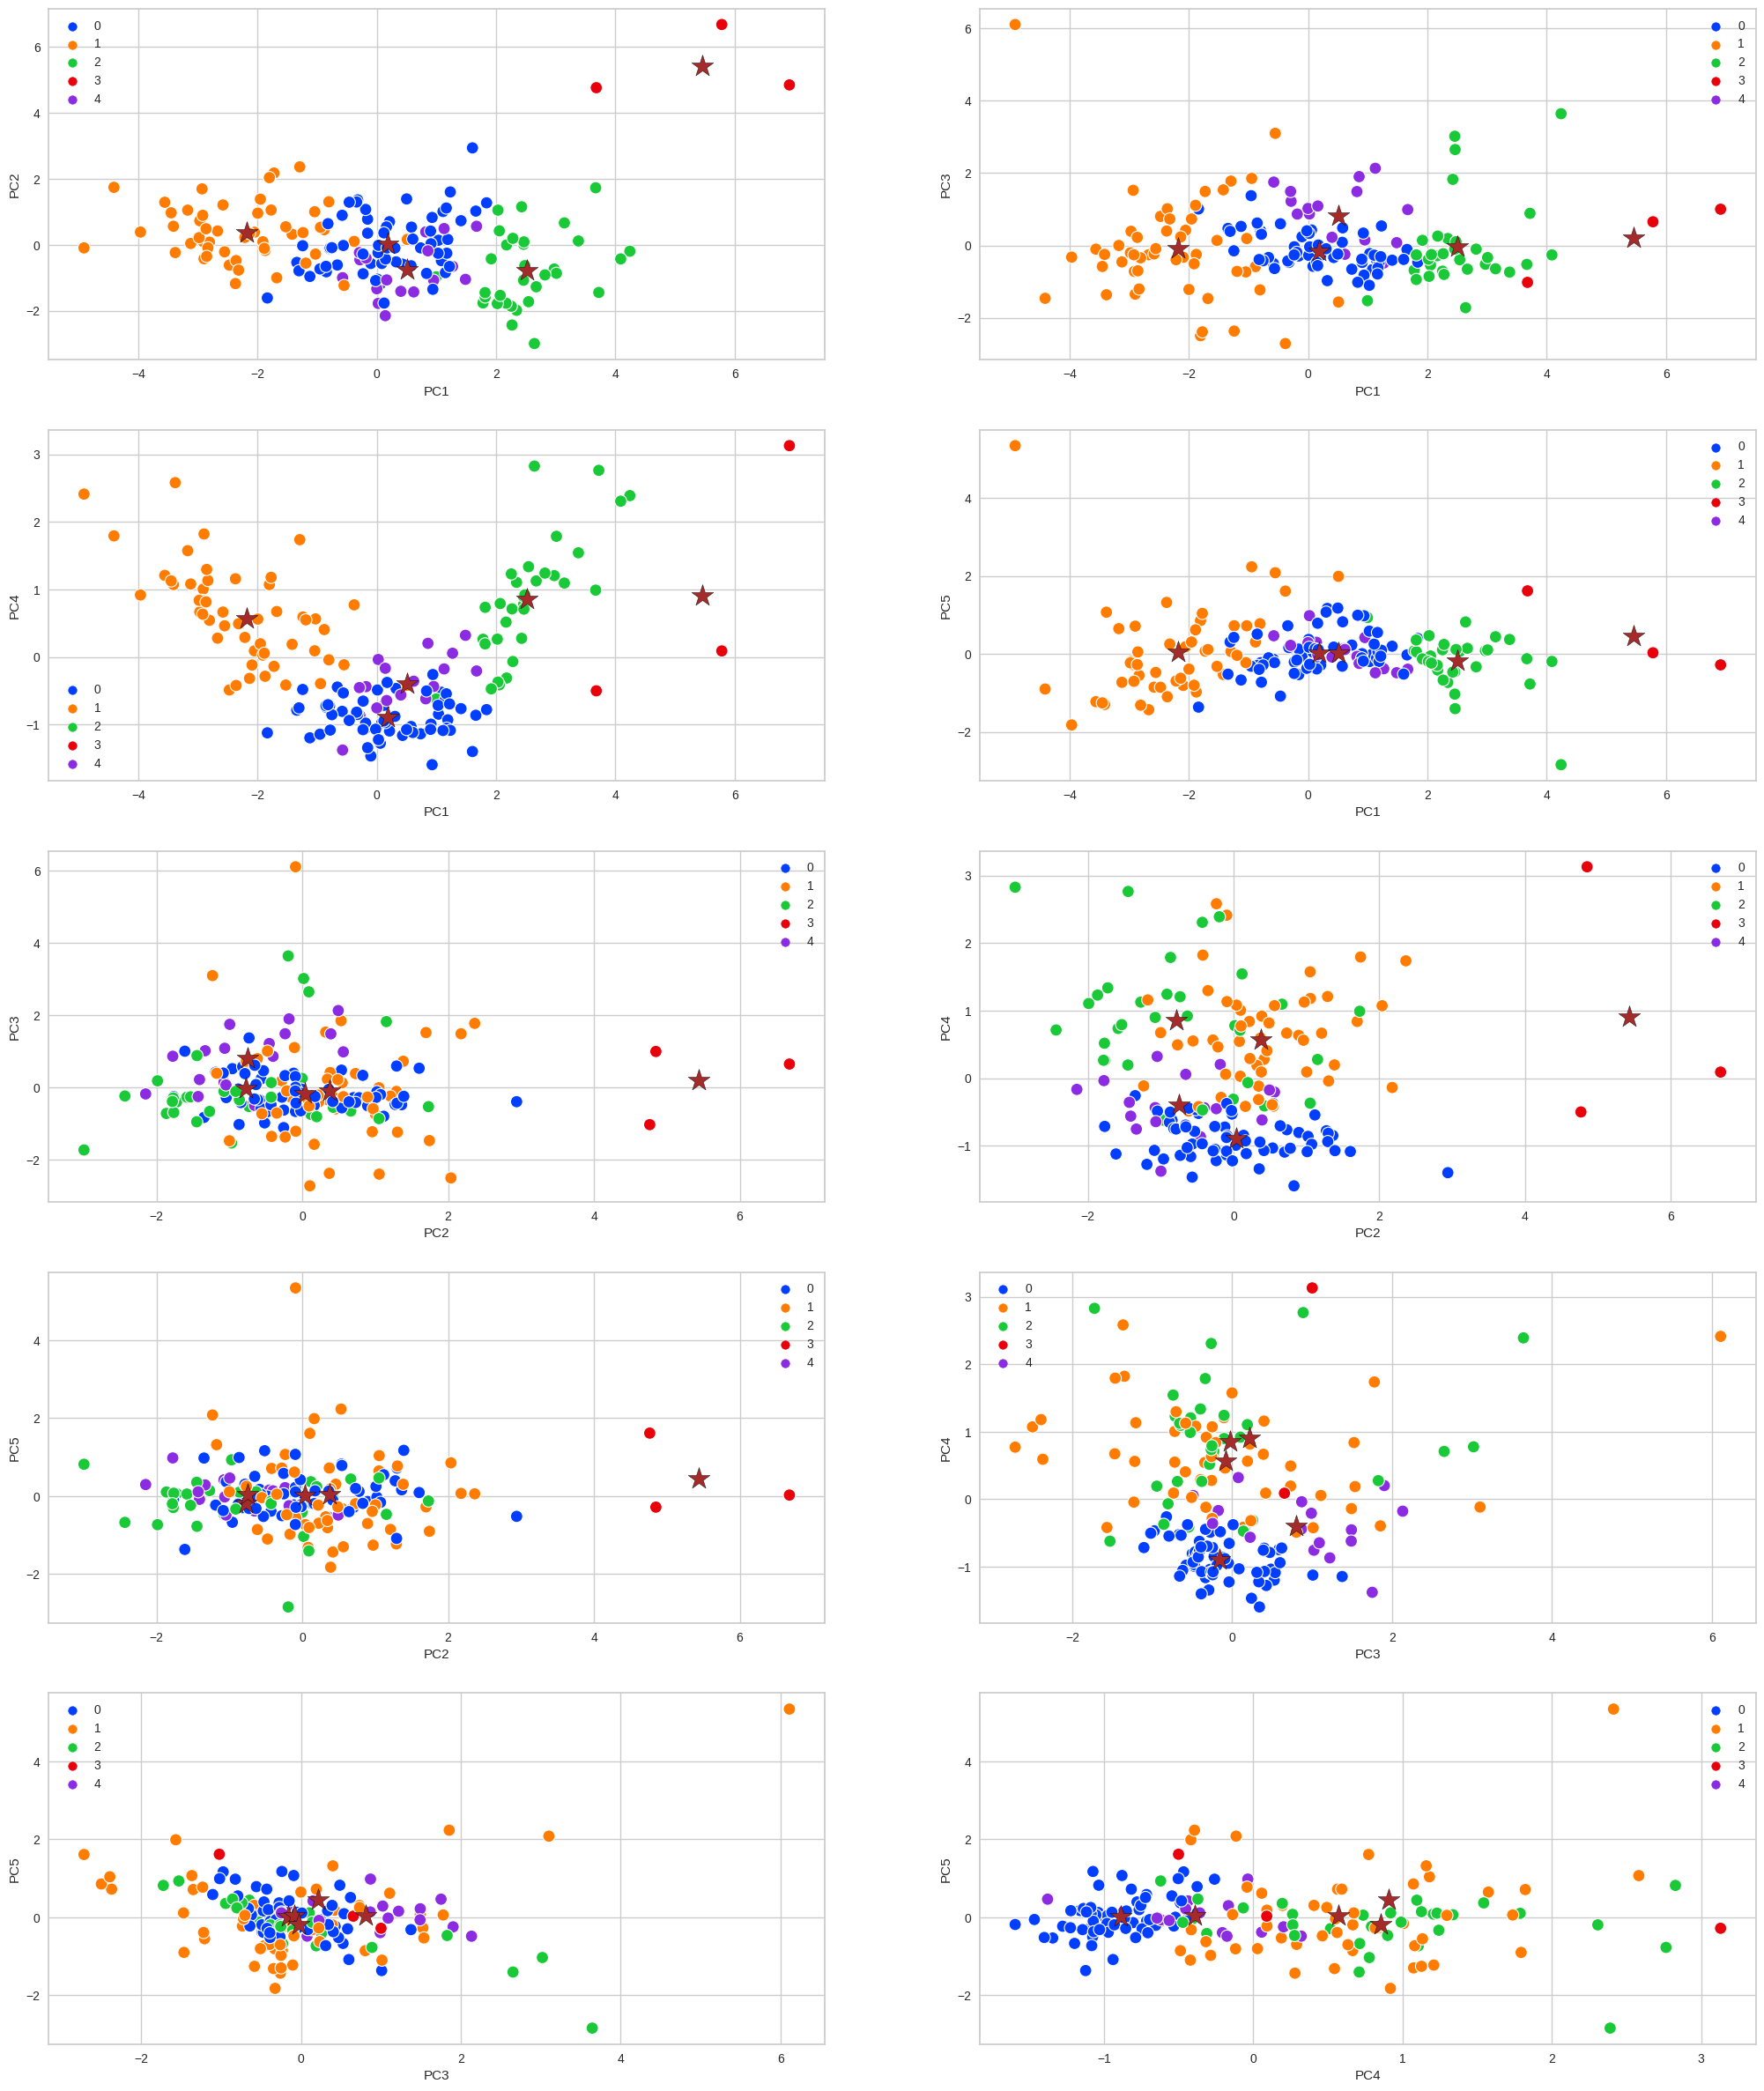

In [22]:
#Performing Gaussian mixture modelling on data with n_components = 4
gmm = GaussianMixture(n_components=k)
gmm.fit(X_transform)

country_labels_gaussian = gmm.predict(X_transform)
#Centroids
centroids_guassian = gmm.means_

#Plotting the clusters and centroids as done in KMeans part
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_gaussian,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_guassian[:,j],centroids_guassian[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [23]:
#Calculating percentage of datapoints in each cluster
unique_labels, counts = np.unique(country_labels_gaussian, return_counts=True)
percentages = counts / len(country_labels_gaussian) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 63	37.72%
Class 1: 52	31.14%
Class 2: 32	19.16%
Class 3: 3	1.80%
Class 4: 17	10.18%



## Hierarchial Clustering

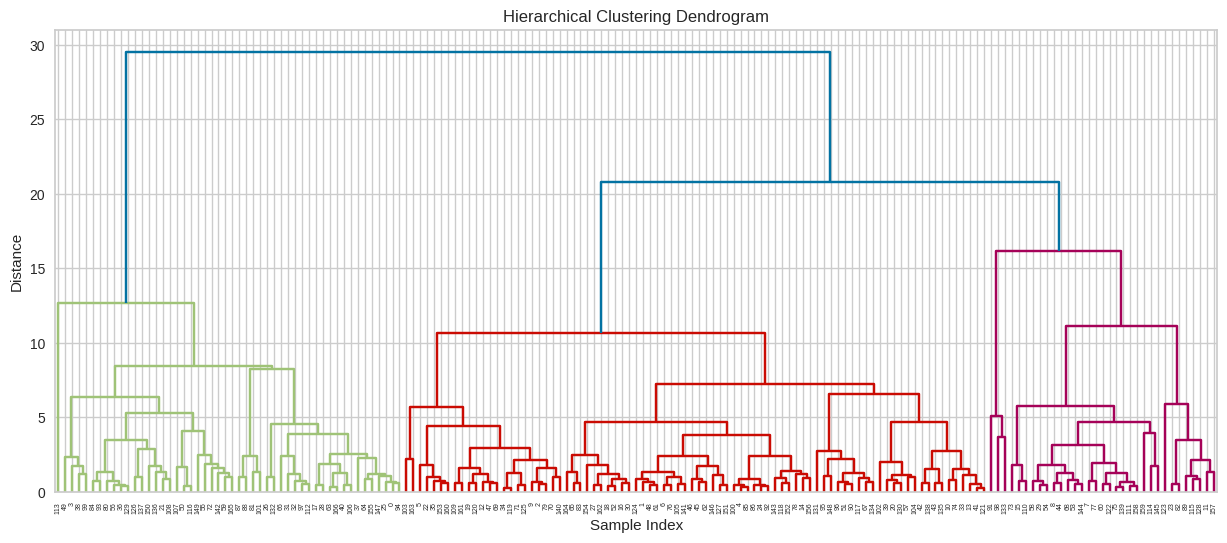

In [24]:
#Calculating optimal value of n_clusters for Agglomerative Clustering


Z = linkage(X_transform, method='ward', metric='euclidean')
#Plotting the dendrogram
plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

Optimal value of n_cluster for Agglomerative Clustering is 3

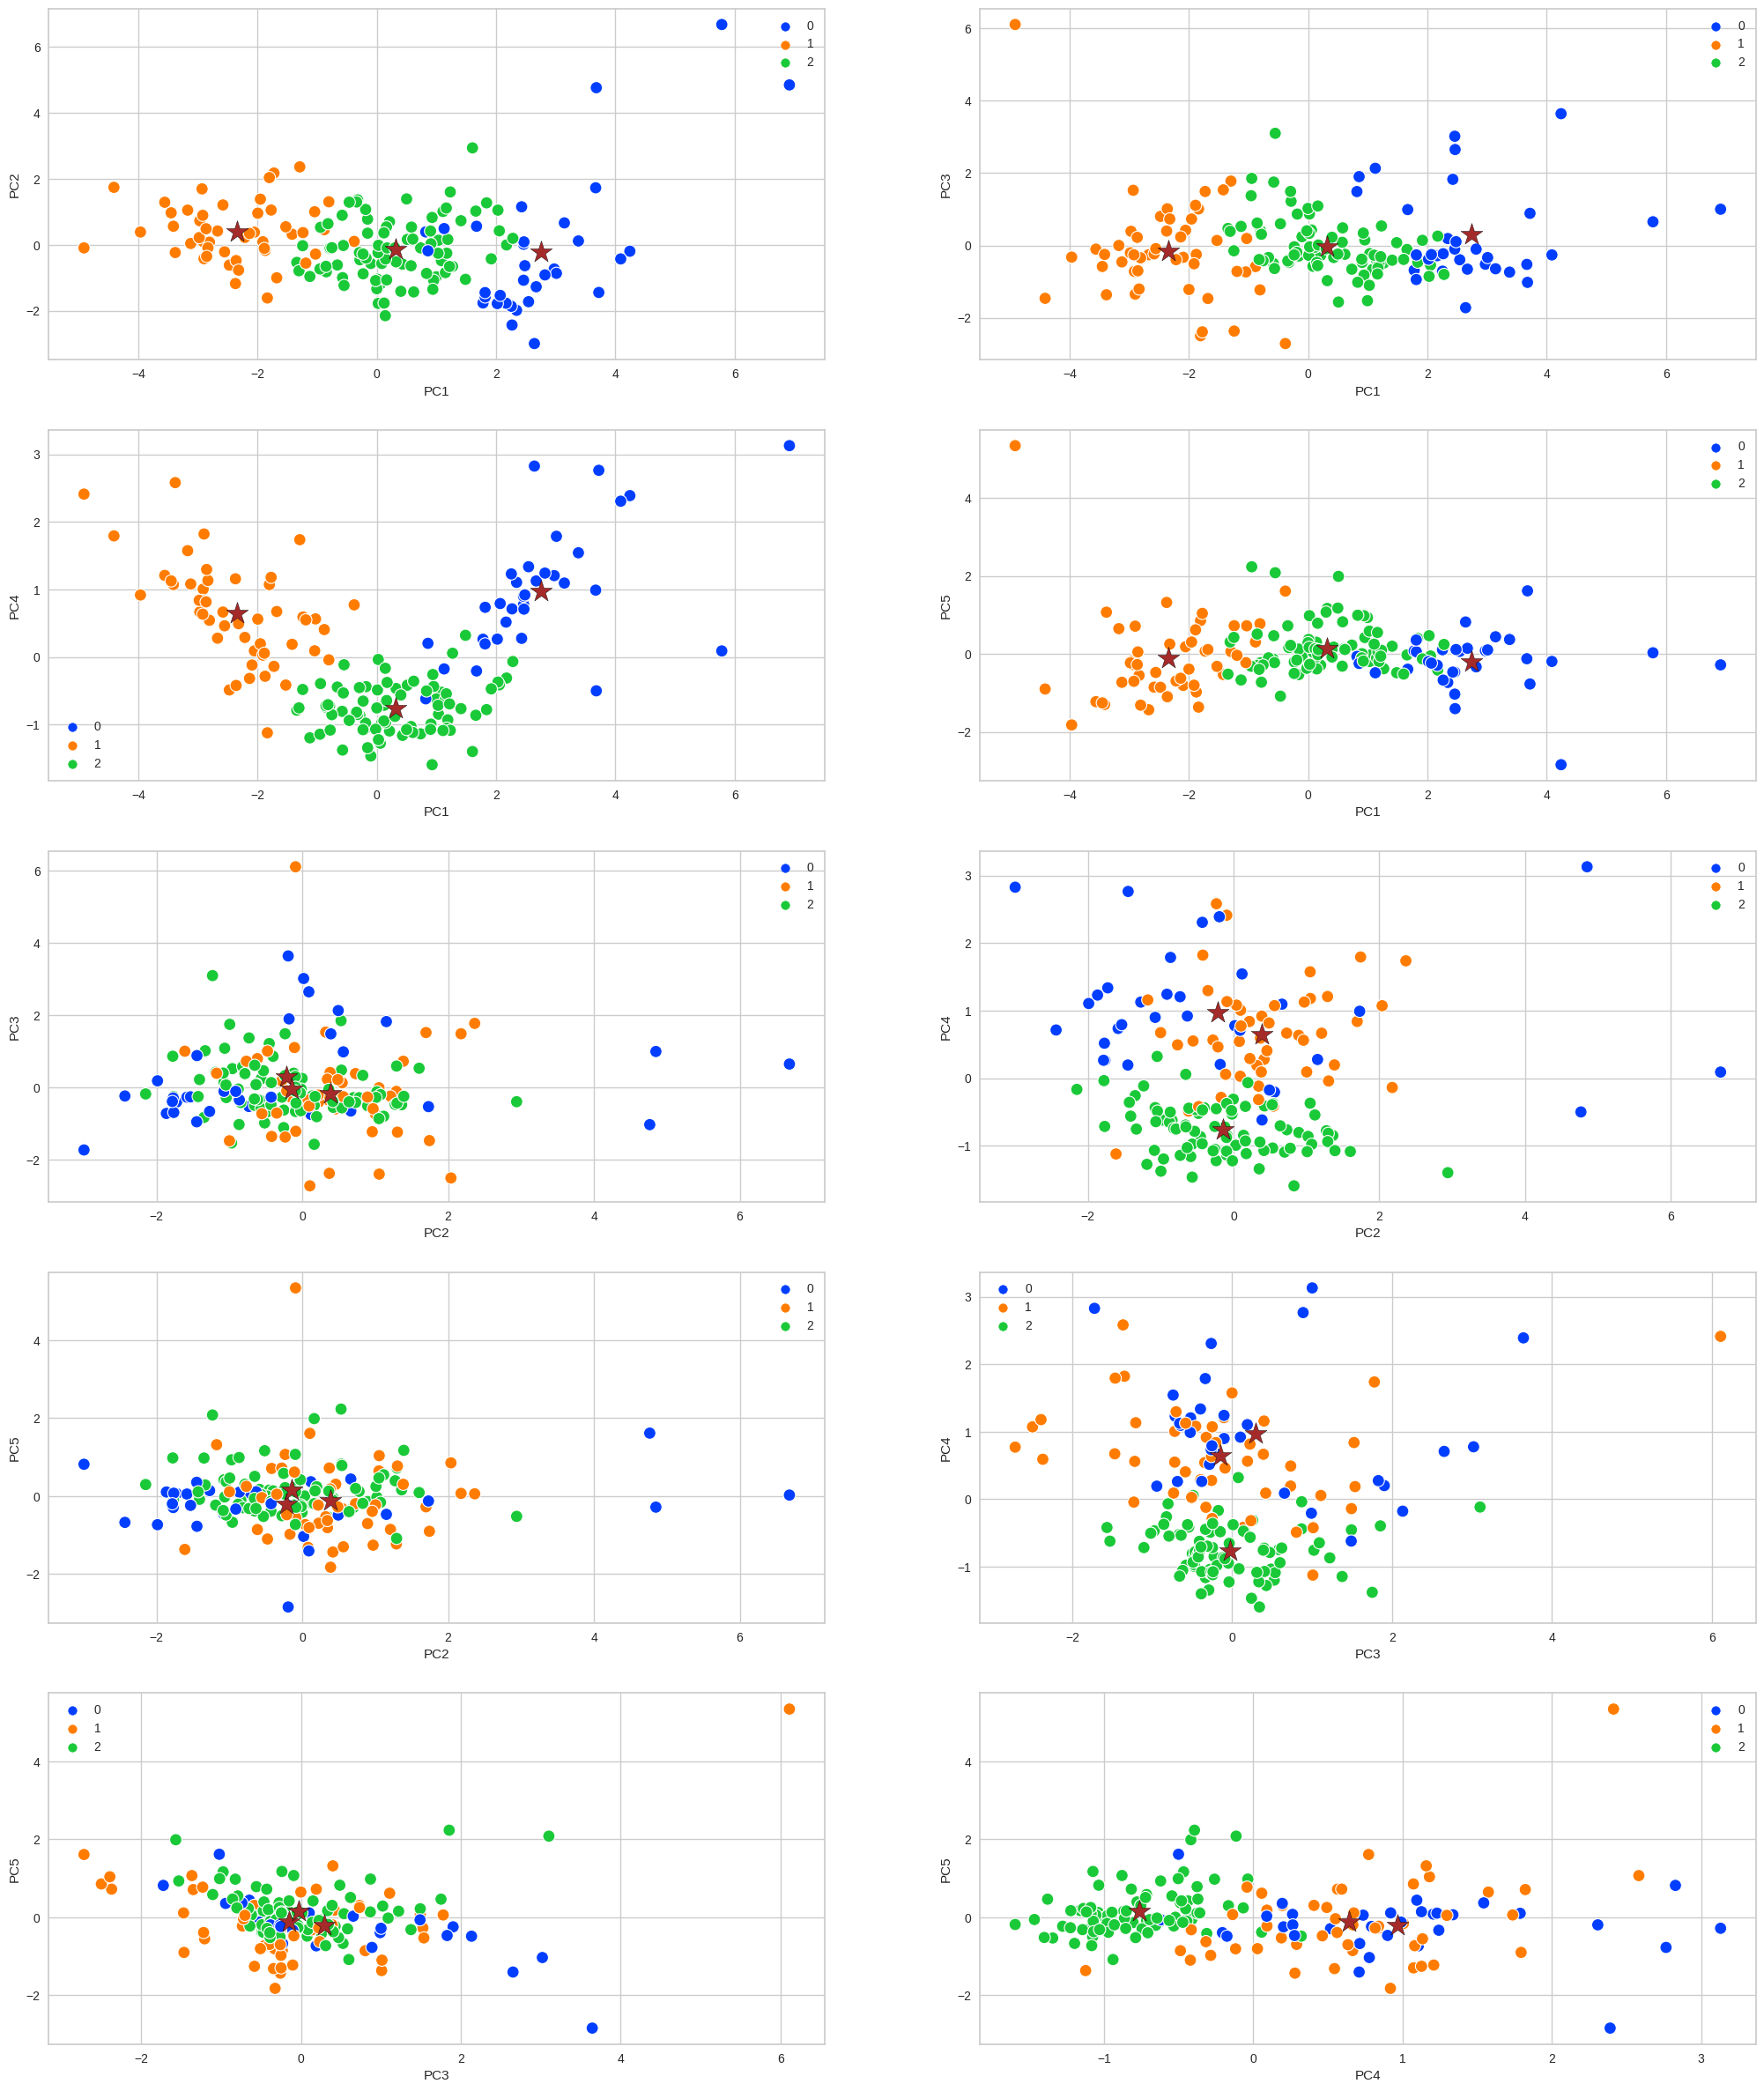

In [25]:
#Fitting Agglomerative Clustering model on data with n_clusters = 3
model_hir_agg = AgglomerativeClustering(n_clusters=3)
model_hir_agg.fit(X_transform)
country_labels_hir_agg = model_hir_agg.labels_

#Plotting the clusters
X_transform['country_labels_hir_agg']=country_labels_hir_agg
centroids_hir_agg=X_transform.groupby('country_labels_hir_agg').mean().values
X_transform.drop('country_labels_hir_agg',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_hir_agg,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_hir_agg[:,j],centroids_hir_agg[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [26]:
#Calculating percentage of datapoints in each cluster

unique_labels, counts = np.unique(country_labels_hir_agg, return_counts=True)
percentages = counts / len(country_labels_hir_agg) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 33	19.76%
Class 1: 50	29.94%
Class 2: 84	50.30%



## DBSCAN Clustering

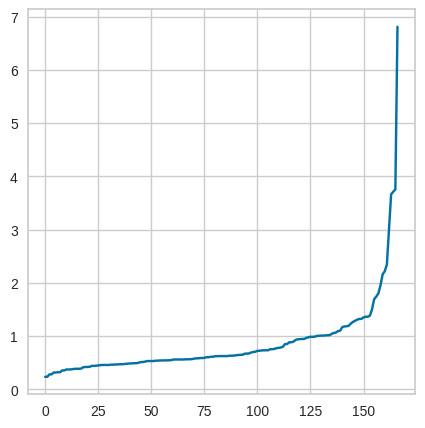

In [27]:
from sklearn.neighbors import NearestNeighbors

#Calculating optimal value for eps for DBSCAN algorithm on the given dataset
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transform)
distances, indices = nbrs.kneighbors(X_transform)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 5,5
plt.plot(distances)

By observing the plot, we can infer that we are getting elbow at around eps = 1.5

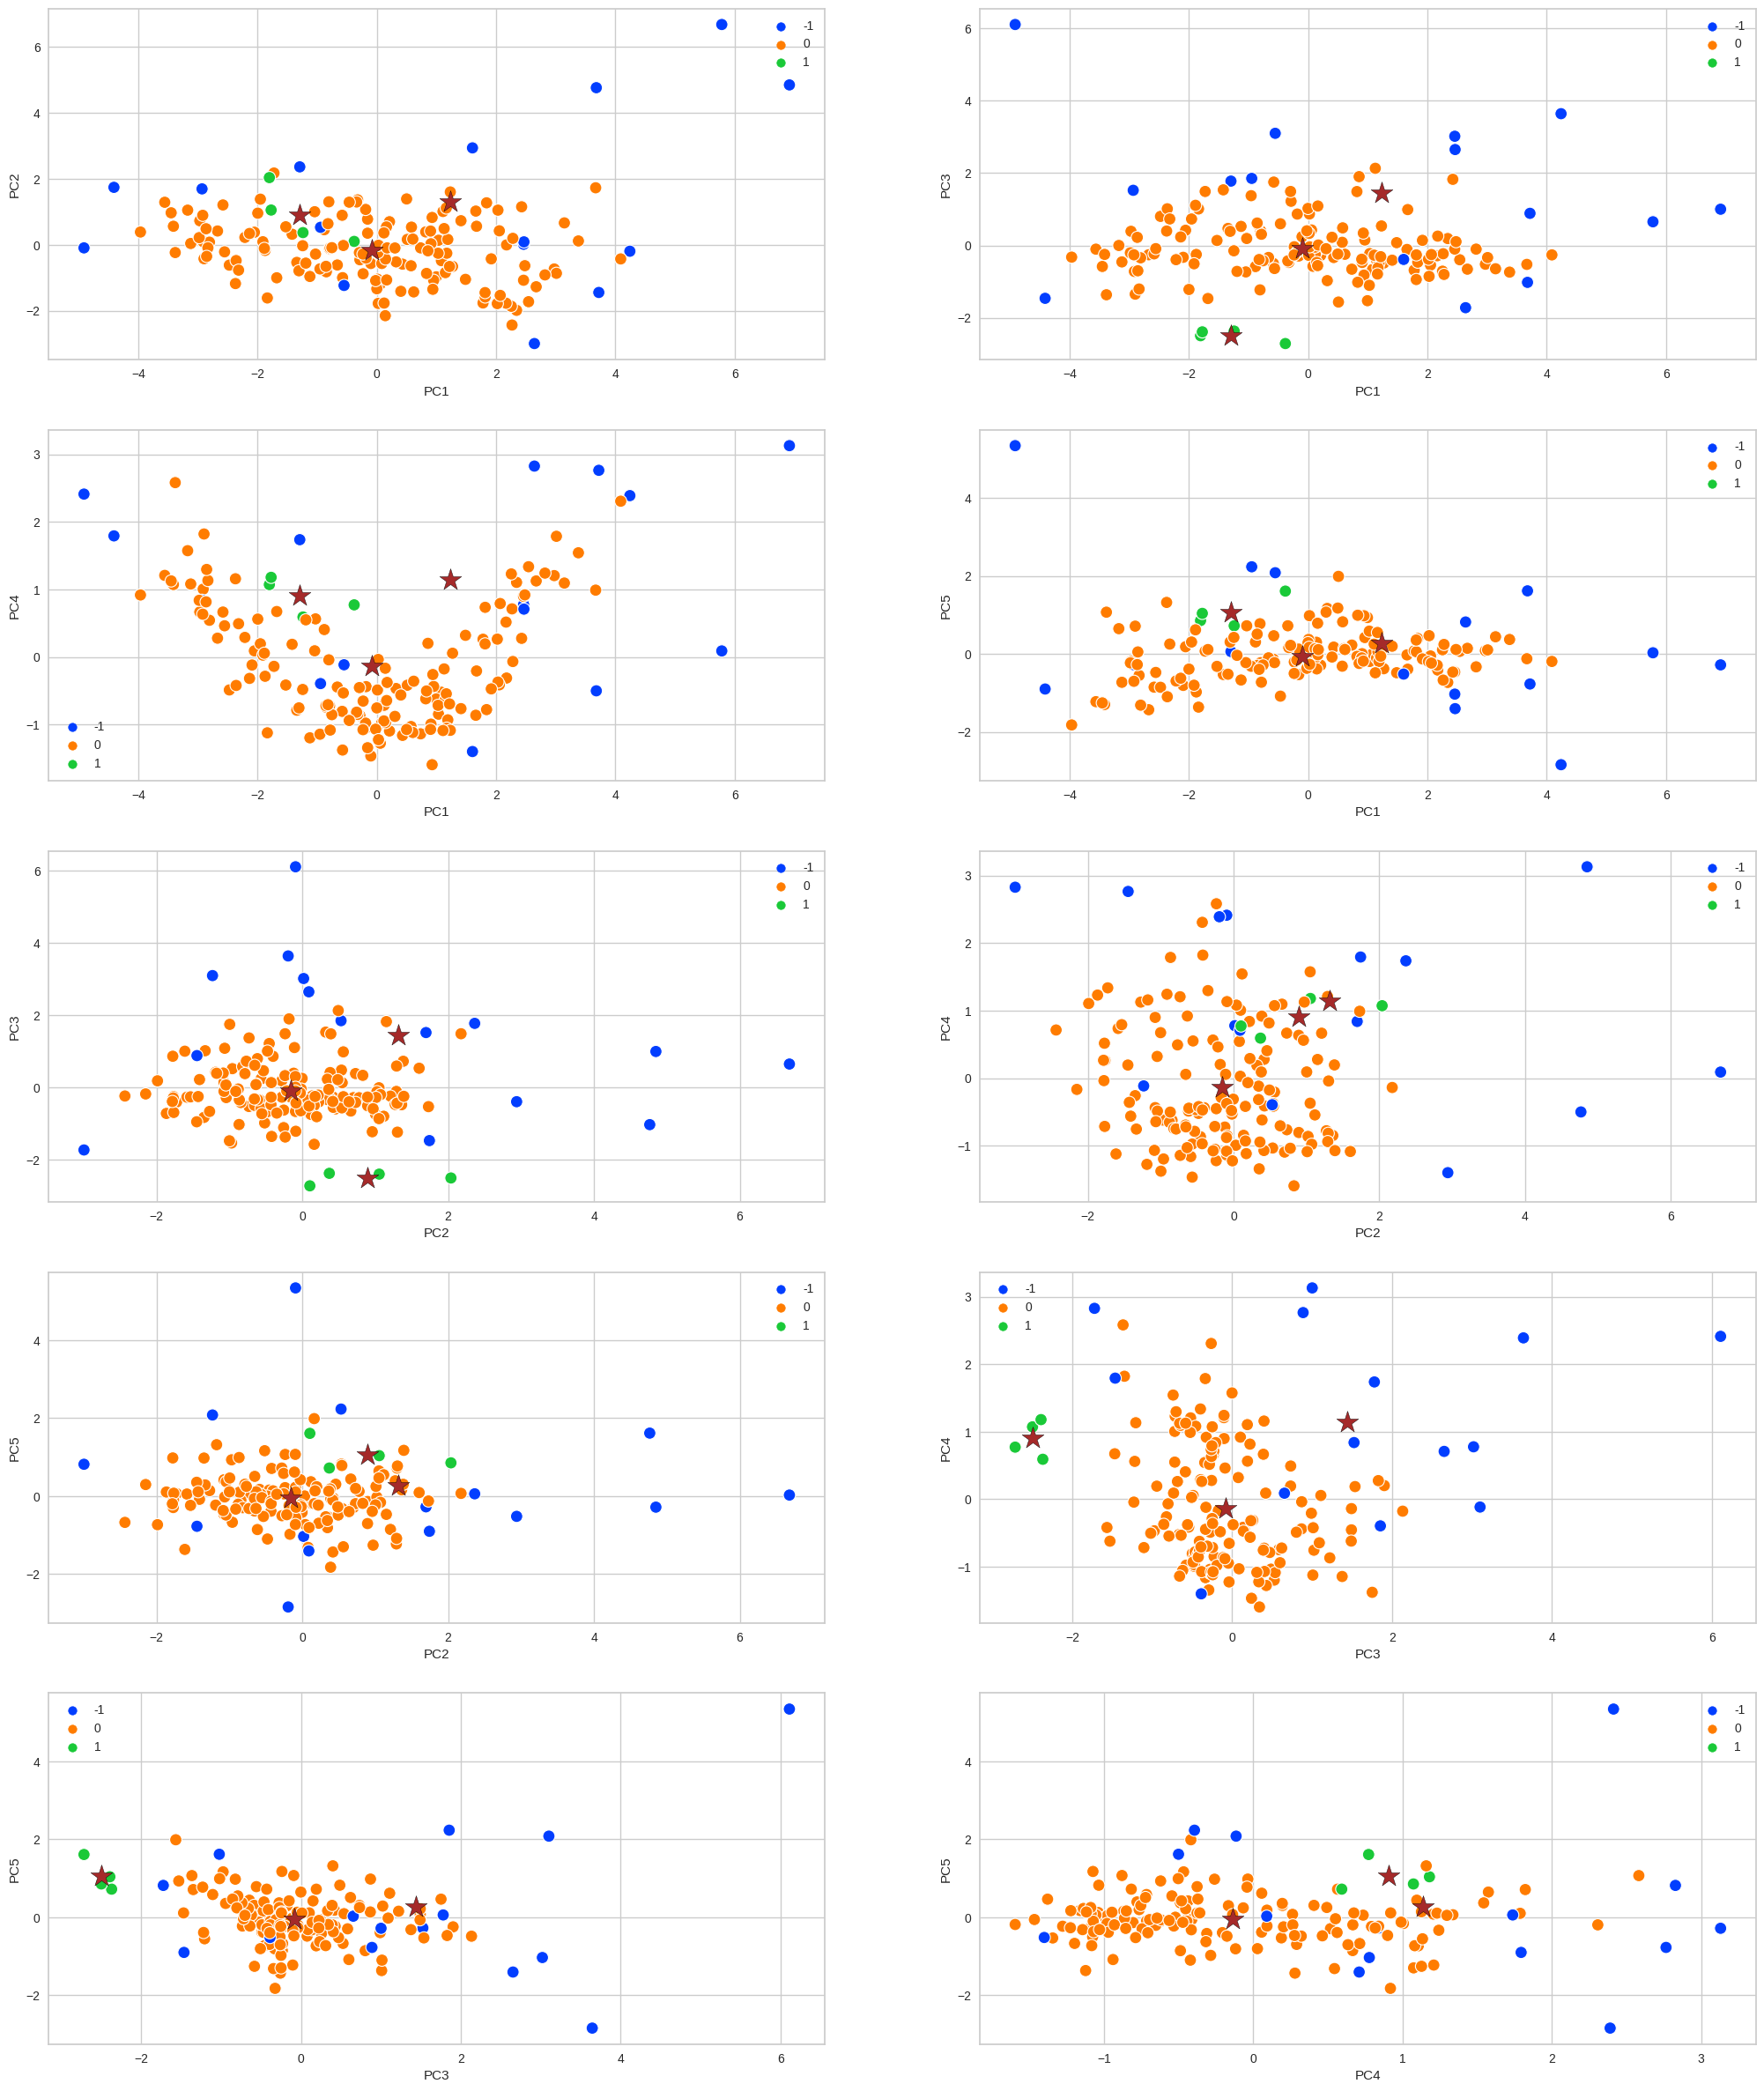

In [28]:
#Fitting a DBSCAN model on the dataset with eps = 1.5 and min_samples = 3
#Here we took min_samples = 3 by the observations from previous clusters where we are getting a cluster with only 3 samples
db = DBSCAN(eps = 1.5, min_samples = 3 )# minimum samples is set to 8
db.fit(X_transform)

#Storing the cluster labels that we got from DBSCAN
country_labels_dbscan = db.labels_

#PLotting the clusters
X_transform['country_labels_dbscan']=country_labels_dbscan
centroids_dbscan=X_transform.groupby('country_labels_dbscan').mean().values
X_transform.drop('country_labels_dbscan',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_dbscan,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_dbscan[:,j],centroids_dbscan[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

## Evaluating the Clustering

In [29]:
print("Gaussian",sscore(X_transform, country_labels_gaussian, metric='euclidean'))

Gaussian 0.1855051826601437


In [30]:
print("KMeans",sscore(X_transform,country_labels_kmeans,metric = 'euclidean'))

KMeans 0.3242136685204338


In [31]:
print("alggomorative",sscore(X_transform,country_labels_hir_agg,metric = 'euclidean'))

alggomorative 0.30427188416905565


In [32]:
print("Dbscan",sscore(X_transform,country_labels_dbscan,metric = 'euclidean'))

Dbscan 0.1929253329808842


From the silhouette score of different clustering algorithms, we can observe that KMeans has highest Silhouette score and thus performing best on the dataset. Therefore, we will choose KMeans to cluster the datapoints and predicting the countries that are need of funding from HELP

In [33]:
country_df['labels']=country_labels_kmeans

unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 86	51.50%
Class 1: 47	28.14%
Class 2: 31	18.56%
Class 3: 3	1.80%



In [34]:
#Calculating means of different clusters and sorting them in increasing order of gdpp
sorted_df = country_df.groupby('labels').mean().sort_values(by='gdpp')
sorted_df

child_mort     exports    health     imports        income  inflation  \
labels                                                                          
1        92.961702   29.151277  6.388511   42.323404   3942.404255  12.019681   
0        21.598837   41.003360  6.216744   47.865883  12790.348837   7.516291   
2         4.903226   46.477419  9.127097   40.483871  44703.225806   2.607613   
3         4.133333  176.000000  6.793333  156.666667  64033.333333   2.468000   

        life_expec  total_fer          gdpp  
labels                                       
1        59.187234   5.008085   1922.382979  
0        72.882558   2.295581   6769.325581  
2        80.283871   1.786129  42574.193548  
3        81.433333   1.380000  57566.666667

From this data, we can infer that cluster 1 contains countries with low gdpp, life expectancy, exoprt-import ratio, income and high inflation, total fertility and child mortality while cluster 2 contains highest gdpp, life expectancy, exports-imports, income and lowest inflation, total fertility and child mortality.
In this way we can rank these cluster from highest to lowest in the following manner:
1 -------> Under Developed
0 -------> Developing
3 -------> Developed
2 -------> Fully Developed

## Plotting The World Map


In [35]:
#Mapping the rank with cluster labels
label_map = dict(zip(sorted_df.index, ['Under Developed', 'Developing', 'Developed', 'Fully Developed']))
label_map

{1: 'Under Developed', 0: 'Developing', 2: 'Developed', 3: 'Fully Developed'}

In [36]:
#Printing the name of countries in different clusters
for label in (np.unique(country_df['labels'])):
    print(label_map[label])
    print(country_df[country_df['labels']==label].values[:,0])
    print('\n')

Developing
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia'
 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives'
 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Serbia'
 'Seychelles' 'Slovak Republic' 'Solomon Islands' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 

In [37]:
country_df.replace([0,1,2,3],['Developing','Under Developed','Fully Developed','Developed'])

country child_mort  exports  health  imports  income  \
0            Afghanistan       90.2     10.0    7.58     44.9    1610   
1                Albania       16.6     28.0    6.55     48.6    9930   
2                Algeria       27.3     38.4    4.17     31.4   12900   
3                 Angola      119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda       10.3     45.5    6.03     58.9   19100   
..                   ...        ...      ...     ...      ...     ...   
162              Vanuatu       29.2     46.6    5.25     52.7    2950   
163            Venezuela       17.1     28.5    4.91     17.6   16500   
164              Vietnam       23.3     72.0    6.84     80.2    4490   
165                Yemen       56.3     30.0    5.18     34.4    4480   
166               Zambia       83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp           labels  
0         9.44        56.2       5.82    553  Under Developed  
1         4.49        76.3       1.65   4090       Developing  
2        16.10        76.5       2.89   4460       Developing  
3        22.40        60.1       6.16   3530  Under Developed  
4         1.44        76.8       2.13  12200       Developing  
..         ...         ...        ...    ...              ...  
162       2.62        63.0       3.50   2970       Developing  
163      45.90        75.4       2.47  13500       Developing  
164      12.10        73.1       1.95   1310       Developing  
165      23.60        67.5       4.67   1310  Under Developed  
166      14.00        52.0       5.40   1460  Under Developed  

[167 rows x 11 columns]

In [38]:
!pip install geopandas
import geopandas as gpd

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.7 MB/s eta 0:00:00


In [39]:
import tensorflow_hub as hub
import tensorflow as tf

from_country = country_df['country']
to_country = world['name']

#GloVe embeddings
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

similarity_score=[]
# Mapping function
def map_country_names(name):
    max_similarity = 0
    best_match = None
    for country_name in to_country:
        similarity = embed([name.lower()]).numpy().dot(embed([country_name.lower()]).numpy().T)
        if similarity > max_similarity:
            best_match = country_name
            max_similarity = similarity
    similarity_score.append(max_similarity)
    return best_match

map_list=[]

#Map from_country to to_country
map_dict_country={}
for name in from_country:
    mapped_name = map_country_names(name)
    map_dict_country[name]=mapped_name
    map_list.append(mapped_name)

In [40]:
map_dict_country

{'Afghanistan': 'Afghanistan',
 'Albania': 'Albania',
 'Algeria': 'Algeria',
 'Angola': 'Angola',
 'Antigua and Barbuda': 'Trinidad and Tobago',
 'Argentina': 'Argentina',
 'Armenia': 'Armenia',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaijan': 'Azerbaijan',
 'Bahamas': 'Bahamas',
 'Bahrain': 'Saudi Arabia',
 'Bangladesh': 'Bangladesh',
 'Barbados': 'Bhutan',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Belize': 'Belize',
 'Benin': 'Benin',
 'Bhutan': 'Bhutan',
 'Bolivia': 'Bolivia',
 'Bosnia and Herzegovina': 'Bosnia and Herz.',
 'Botswana': 'Botswana',
 'Brazil': 'Brazil',
 'Brunei': 'Brunei',
 'Bulgaria': 'Bulgaria',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cambodia': 'Cambodia',
 'Cameroon': 'Cameroon',
 'Canada': 'Canada',
 'Cape Verde': 'Panama',
 'Central African Republic': 'Central African Rep.',
 'Chad': 'Chad',
 'Chile': 'Chile',
 'China': 'China',
 'Colombia': 'Colombia',
 'Comoros': 'Nicaragua',
 'Congo, Dem. Rep.': 'Dem. Rep. Congo',
 'Co

In [41]:
#GloVe mapped
cnt=0
for i in map_dict_country:
    if(map_dict_country[i]!=i):
        print(i,'<-->',map_dict_country[i])
        cnt+=1

print("Total not exact matches :",cnt)

Antigua and Barbuda <--> Trinidad and Tobago
Bahrain <--> Saudi Arabia
Barbados <--> Bhutan
Bosnia and Herzegovina <--> Bosnia and Herz.
Cape Verde <--> Panama
Central African Republic <--> Central African Rep.
Comoros <--> Nicaragua
Congo, Dem. Rep. <--> Dem. Rep. Congo
Congo, Rep. <--> Dem. Rep. Congo
Cote d'Ivoire <--> Côte d'Ivoire
Czech Republic <--> Russia
Dominican Republic <--> Saudi Arabia
Equatorial Guinea <--> Guinea
Grenada <--> Romania
Kiribati <--> Qatar
Kyrgyz Republic <--> United Kingdom
Lao <--> Sri Lanka
Macedonia, FYR <--> Solomon Is.
Maldives <--> Timor-Leste
Malta <--> Italy
Mauritius <--> Rwanda
Micronesia, Fed. Sts. <--> Tajikistan
Samoa <--> Bulgaria
Seychelles <--> Guyana
Singapore <--> Australia
Slovak Republic <--> Moldova
Solomon Islands <--> Solomon Is.
St. Vincent and the Grenadines <--> Trinidad and Tobago
Tonga <--> Mali
United States <--> United States of America
Total not exact matches : 30


In [42]:
#country names in world
np.sort(np.array(world['name']))

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 

In [43]:
flattened_score_similarity = np.concatenate(similarity_score).flatten()
# print(flattened_score_similarity)
np.sum(flattened_score_similarity<0.80)

25

In [44]:
#incorrect mapping by similarity score
arr=[]
for i,value in enumerate(flattened_score_similarity):
    if(value<0.7):
        arr.append(from_country[i]+'<-->'+map_list[i])

print(arr)

['Antigua and Barbuda<-->Trinidad and Tobago', 'Bosnia and Herzegovina<-->Bosnia and Herz.', 'Cape Verde<-->Panama', 'Comoros<-->Nicaragua', 'Czech Republic<-->Russia', 'Dominican Republic<-->Saudi Arabia', 'Grenada<-->Romania', 'Kiribati<-->Qatar', 'Kyrgyz Republic<-->United Kingdom', 'Lao<-->Sri Lanka', 'Macedonia, FYR<-->Solomon Is.', 'Maldives<-->Timor-Leste', 'Malta<-->Italy', 'Mauritius<-->Rwanda', 'Micronesia, Fed. Sts.<-->Tajikistan', 'Seychelles<-->Guyana', 'Singapore<-->Australia', 'Slovak Republic<-->Moldova', 'Solomon Islands<-->Solomon Is.', 'St. Vincent and the Grenadines<-->Trinidad and Tobago', 'Tonga<-->Mali']


In [45]:
# HAND MAPPING incorrect classified one
incorrect=['Antigua and Barbuda', 'Bahrain','Barbados','Cape Verde','Comoros','Czech Republic','Dominican Republic','Grenada',
           'Kiribati','Kyrgyz Republic','Macedonia, FYR','Maldives','Malta','Mauritius','Micronesia, Fed. Sts.','Samoa','Seychelles','Singapore','Slovak Republic',
           'St. Vincent and the Grenadines','Tonga']

len(incorrect)

21

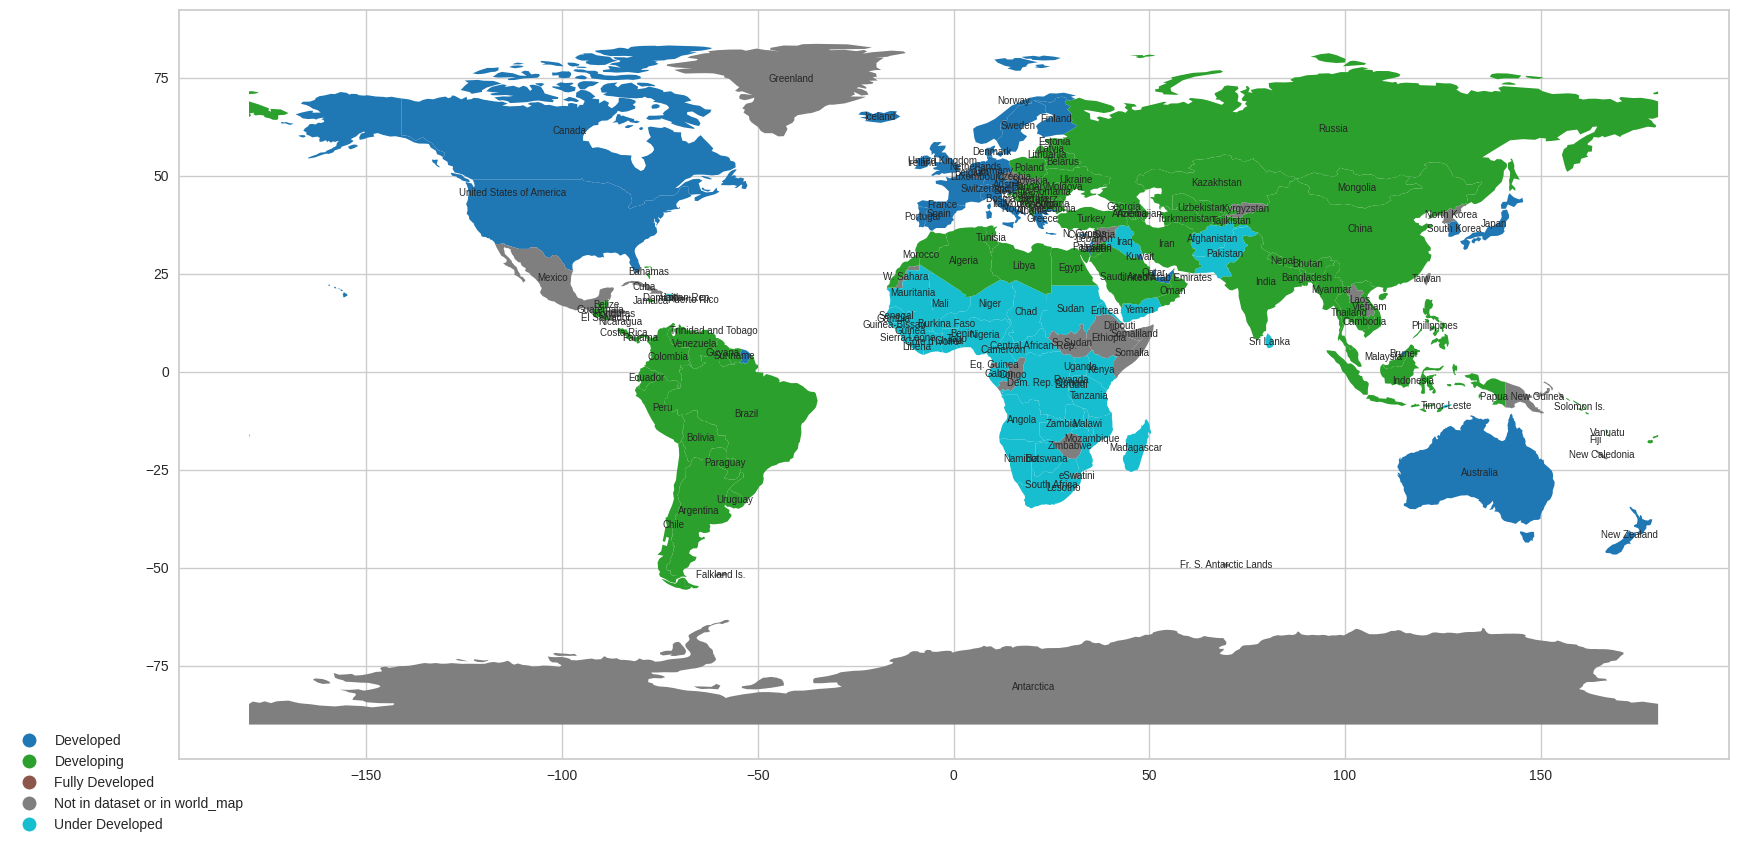

In [46]:
import matplotlib as mpl

label_colors = {}
map_cntry_to_label = {}
bol=False
for label in (np.unique(country_df['labels'])):
    for i in country_df[country_df['labels'] == label].values[:,0]:
        if i not in incorrect:
            map_cntry_to_label[map_dict_country[i]] = label_map[label]
            label_colors[label_map[label]] = mpl.colors.to_hex(mpl.cm.get_cmap('tab10')(label))

for name in world['name']:
    if name not in map_dict_country.values():
        map_cntry_to_label[name] = 'Not in dataset or in world_map'
        label_colors['Not in dataset or in world_map'] = '#cccccc'

world['color'] = world['name'].map(map_cntry_to_label)


# create the plot
fig, ax = plt.subplots(figsize=(20, 22))
world.plot(column='color', ax=ax, legend=True)

# Add country names to the plot
for idx, row in world.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], ha='center', va='center', fontsize=7)

legend = ax.get_legend()
legend.set_bbox_to_anchor((0.05, 0.05))

## Money for Under Developed


### Scaling the new data

In [93]:
## Scaling the data 
country_label_df = country_df.copy()
country_label_df["labels"] = country_df["labels"].replace(label_map)
# country_label_df
#Seperating Dataset from the country names
X = country_label_df.copy()
X = country_label_df[country_label_df["labels"] == "Under Developed"]
Y = X["country"]
X = X.drop(["country","labels"] ,axis = 1)
X = X.reset_index().drop("index",axis = 1)
X

child_mort  exports  health  imports  income  inflation  life_expec  \
0         90.2    10.00    7.58     44.9    1610      9.440        56.2   
1        119.0    62.30    2.85     42.9    5900     22.400        60.1   
2        111.0    23.80    4.10     37.2    1820      0.885        61.8   
3         52.5    43.60    8.30     51.3   13300      8.920        57.1   
4        116.0    19.20    6.74     29.6    1430      6.810        57.9   
5         93.6     8.92   11.60     39.2     764     12.300        57.7   
6        108.0    22.20    5.13     27.0    2660      1.910        57.3   
7        149.0    11.80    3.98     26.5     888      2.010        47.5   
8        150.0    36.80    4.53     43.5    1930      6.390        56.5   
9         88.2    16.50    4.51     51.7    1410      3.870        65.9   
10       116.0    41.10    7.91     49.6     609     20.800        57.5   
11        63.9    85.10    2.46     54.7    5190     20.700        60.4   
12       111.0    50.60    5.30     43.3    2690      5.390        56.3   
13       111.0    85.80    4.48     58.9   33700     24.900        60.9   
14        55.2     4.79    2.66     23.3    1420     11.600        61.7   
15        63.7    57.70    3.50     18.9   15400     16.600        62.9   
16        80.3    23.80    5.69     42.7    1660      4.300        65.5   
17        74.7    29.50    5.22     45.9    3060     16.600        62.2   
18       109.0    30.30    4.93     43.2    1190     16.100        58.0   
19       114.0    14.90    8.50     35.2    1390      2.970        55.6   
20       208.0    15.30    6.91     64.7    1500      5.450        32.1   
21        36.9    39.40    8.41     34.1   12700     16.600        67.2   
22        62.2    20.70    4.75     33.6    2480      2.090        62.8   
23        62.7    13.30   11.30     79.9    1730      1.520        60.7   
24        78.9    35.40    4.47     49.3    3980      9.200        63.8   
25        99.7    39.40   11.10    101.0    2380      4.150        46.5   
26        89.3    19.10   11.80     92.6     700      5.470        60.8   
27        62.2    25.00    3.77     43.0    1390      8.790        60.8   
28        90.5    22.80    6.59     34.9    1030     12.100        53.1   
29       137.0    22.80    4.98     35.1    1870      4.370        59.5   
30        97.4    50.70    4.41     61.2    3320     18.900        68.2   
31       101.0    31.50    5.21     46.2     918      7.640        54.5   
32        56.0    47.80    6.78     60.7    8460      3.560        58.6   
33       123.0    22.20    5.16     49.1     814      2.550        58.8   
34       130.0    25.30    5.07     17.4    5150    104.000        60.5   
35        92.1    13.50    2.20     19.4    4280     10.900        65.3   
36        63.6    12.00   10.50     30.0    1350      2.610        64.6   
37        66.8    24.90    5.66     40.3    2180      1.850        64.0   
38       160.0    16.80   13.10     34.5    1220     17.200        55.0   
39        53.7    28.60    8.94     27.4   12000      6.350        54.3   
40        76.7    19.70    6.32     17.2    3370     19.600        66.3   
41        71.9    18.70    6.01     29.1    2090      9.250        59.3   
42        62.6     2.20    9.12     27.8    1850     26.500        71.1   
43        90.3    40.20    7.65     57.3    1210      1.180        58.7   
44        81.0    17.10    9.01     28.6    1540     10.600        56.8   
45        56.3    30.00    5.18     34.4    4480     23.600        67.5   
46        83.1    37.00    5.89     30.9    3280     14.000        52.0   

    total_fer   gdpp  
0        5.82    553  
1        6.16   3530  
2        5.36    758  
3        2.88   6350  
4        5.87    575  
5        6.26    231  
6        5.11   1310  
7        5.21    446  
8        6.59    897  
9        4.75    769  
10       6.54    334  
11       4.95   2740  
12       5.27   1220  
13       5.21  17100  
14       4.61    482  
15       4.08   8750  
16       5.7

In [94]:
#Scaling the Dataset X using Standard Scalar
X_scale = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns = X.columns)
X_scale

child_mort   exports    health   imports    income  inflation  life_expec  \
0    -0.083642 -1.065952  0.452428  0.146872 -0.417885  -0.168122   -0.468615   
1     0.788603  1.845044 -1.343631  0.032867  0.350733   0.676504    0.143188   
2     0.546313 -0.297850 -0.868985 -0.292047 -0.380260  -0.725667    0.409871   
3    -1.225434  0.804210  0.725824  0.511689  1.676553  -0.202012   -0.327430   
4     0.697744 -0.553884  0.133466 -0.725266 -0.450135  -0.339524   -0.201932   
5     0.019332 -1.126064  1.978888 -0.178042 -0.569459   0.018269   -0.233306   
6     0.455454 -0.386905 -0.477877 -0.873473 -0.229762  -0.658866   -0.296055   
7     1.697191 -0.965765 -0.914551 -0.901974 -0.547242  -0.652348   -1.833405   
8     1.727477  0.425725 -0.705707  0.067069 -0.360552  -0.366896   -0.421553   
9    -0.144214 -0.704165 -0.713301  0.534490 -0.453718  -0.531129    1.053048   
10    0.697744  0.665061  0.577735  0.414784 -0.597229   0.572229   -0.264681   
11   -0.880171  3.114082 -1.491720  0.705497  0.223525   0.565712    0.190250   
12    0.546313  1.193827 -0.413325  0.055668 -0.224387  -0.432068   -0.452928   
13    0.546313  3.153044 -0.724693  0.944908  5.331518   0.839433    0.268686   
14   -1.143661 -1.355938 -1.415777 -1.084382 -0.451926  -0.027351    0.394184   
15   -0.886228  1.589010 -1.096815 -1.335193  2.052800   0.298507    0.582431   
16   -0.383476 -0.297850 -0.265236  0.021467 -0.408927  -0.503105    0.990299   
17   -0.553079  0.019410 -0.443703  0.203875 -0.158096   0.298507    0.472620   
18    0.485740  0.063937 -0.553821  0.049968 -0.493134   0.265922   -0.186244   
19    0.637172 -0.793220  0.801767 -0.406052 -0.457301  -0.589784   -0.562738   
20    3.484081 -0.770956  0.198018  1.275523 -0.437593  -0.428158   -4.249242   
21   -1.697900  0.570440  0.767593 -0.468755  1.569054   0.298507    1.256982   
22   -0.931657 -0.470394 -0.622169 -0.497256 -0.262012  -0.647135    0.566744   
23   -0.916514 -0.882275  1.864973  2.141961 -0.396385  -0.684283    0.237311   
24   -0.425876  0.347801 -0.728490  0.397684  0.006736  -0.183764    0.723616   
25    0.204078  0.570440  1.789030  3.344715 -0.279928  -0.512881   -1.990278   
26   -0.110899 -0.559450  2.054832  2.865893 -0.580925  -0.426854    0.252999   
27   -0.931657 -0.231058 -0.994292  0.038568 -0.457301  -0.210484    0.252999   
28   -0.074556 -0.353509  0.076509 -0.423153 -0.521801   0.005235   -0.954919   
29    1.333756 -0.353509 -0.534835 -0.411752 -0.371302  -0.498543    0.049064   
30    0.134419  1.199393 -0.751273  1.076014 -0.111513   0.448402    1.413855   
31    0.243450  0.130729 -0.447500  0.220976 -0.541867  -0.285431   -0.735298   
32   -1.119432  1.037980  0.148655  1.047512  0.809395  -0.551332   -0.092121   
33    0.909748 -0.386905 -0.466486  0.386283 -0.560500  -0.617156   -0.060746   
34    1.121752 -0.214360 -0.500660 -1.420697  0.216359   5.994519    0.205937   
35   -0.026098 -0.871143 -1.590447 -1.306692  0.060485  -0.072972    0.958925   
36   -0.889256 -0.954633  1.561200 -0.702465 -0.464468  -0.613245    0.849114   
37   -0.792340 -0.236624 -0.276627 -0.115339 -0.315761  -0.662776    0.754991   
38    2.030340 -0.687467  2.548463 -0.445954 -0.487759   0.337610   -0.656862   
39   -1.189090 -0.030684  0.968843 -0.850672  1.443639  -0.369503   -0.766673   
40   -0.492506 -0.526054 -0.026015 -1.432098 -0.102555   0.494023    1.115797   
41   -0.637880 -0.581714 -0.143727 -0.753768 -0.331886  -0.180505    0.017690   
42   -0.919543 -1.500097  1.037192 -0.827871 -0.374886   0.943708    1.868785   
43   -0.080613  0.614967  0.479008  0.853704 -0.489551  -0.706441   -0.076434   
44   -0.362275 -0.670769  0.995423 -0.782269 -0.430427  -0.092523   -0.374491   
45   -1.110346  0.047240 -0.458891 -0.451654  0.096318   0.754710    1.304044   
46   -0.298674  0.436857 -0.189293 -0.651163 -0.118680   0.129061   -1.127479   

    total_fer      gdpp  
0    0.788080 -0.468247  
1    1.118099  0.549709  
2    0.341584 -0.398149  
3   -2.0656

### Vizualizing the data

<Axes: ylabel='Density'>

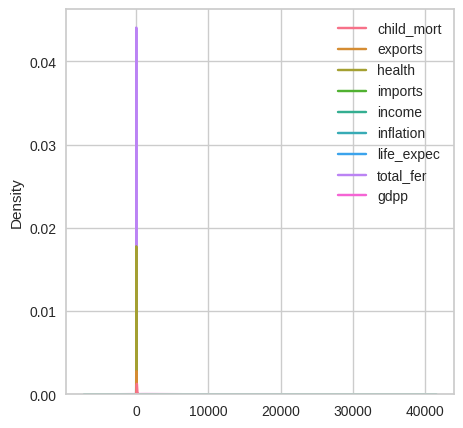

In [95]:
## Vizualizing the data

#kde Plot of unscaled Data
sns.kdeplot(data=X)

<Axes: ylabel='Density'>

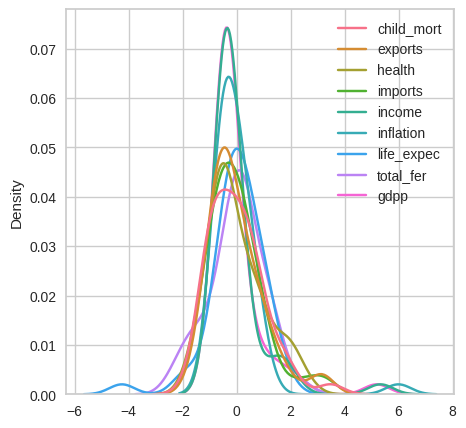

In [96]:
#kde Plot of Scaled Data
sns.kdeplot(data=X_scale)

[Text(0.5, 47.7222222222222, ''), Text(58.222222222222214, 0.5, '')]

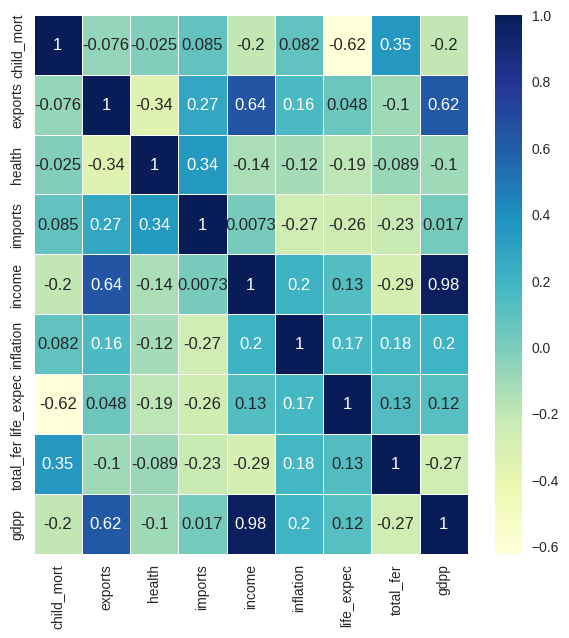

In [97]:
#Correlation heatmap for the data
plt.rcParams["figure.figsize"] = (7,7)
ax = sns.heatmap(data = X.corr(),annot = True,cmap ='YlGnBu',linewidth=.5)
ax.set(xlabel="", ylabel="")

From heatmap, we can infer for under developed countries, 

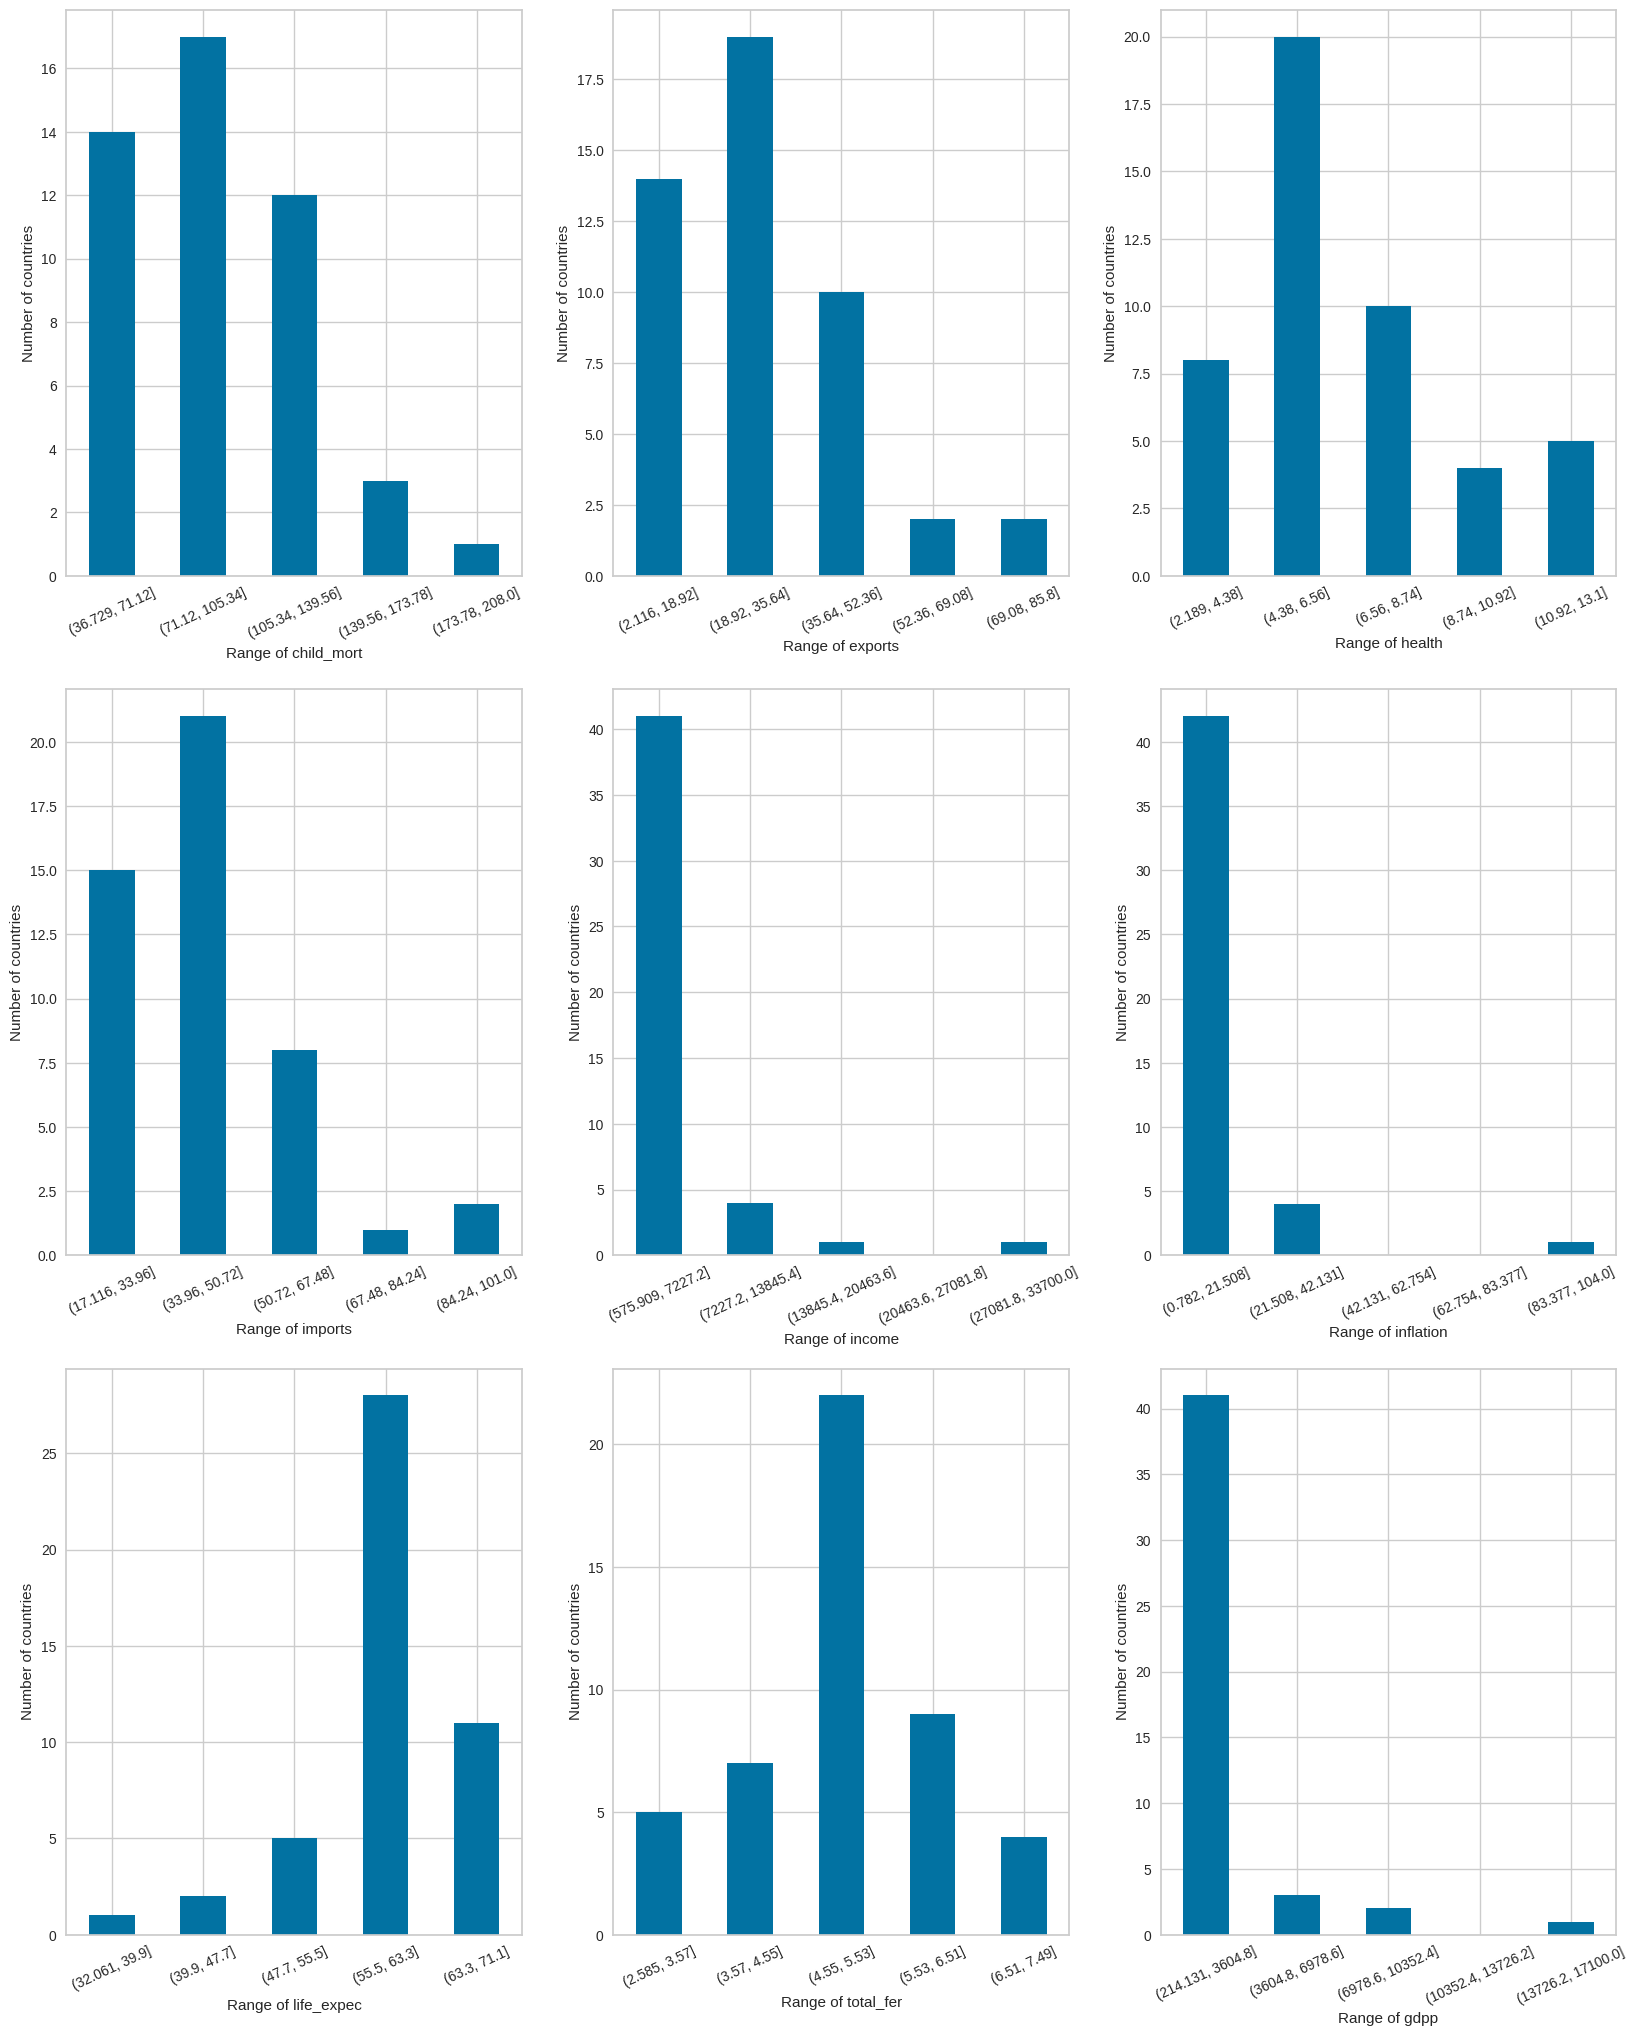

In [98]:
#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X.columns:
    temp = pd.cut(x = X[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

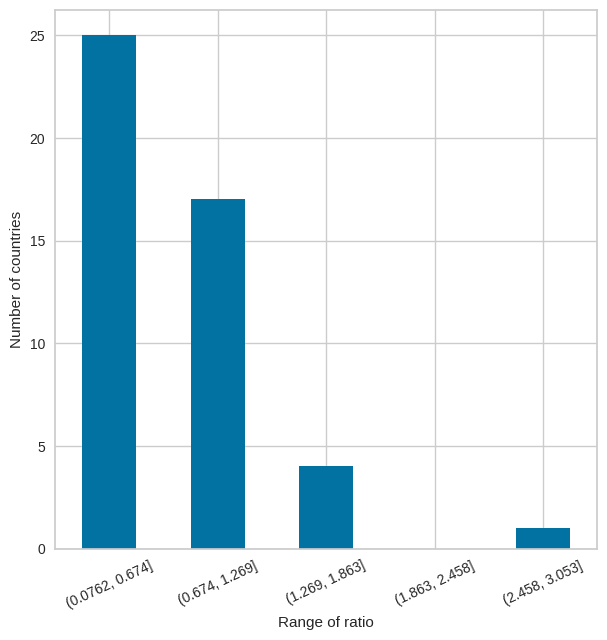

In [99]:
#Calculating export import ratio for countries
new_Da = X.copy()
new_Da["ratio"] = X["exports"]/X["imports"]
temp = pd.cut(x = new_Da["ratio"],bins = 5)
bin_counts = temp.value_counts().sort_index()
plt.xlabel("Range of ratio")
plt.ylabel("Number of countries")
bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

From the above plot we can infer that around 50% of the countries have equal amount of exports and imports showing their developing nature. Countries with less exports but higher imports shows their underdeveloped nature as depicted by the range of ratio (0.0762,0.674]. There are some countries showing their developed nature with higher export import ratio (>1).

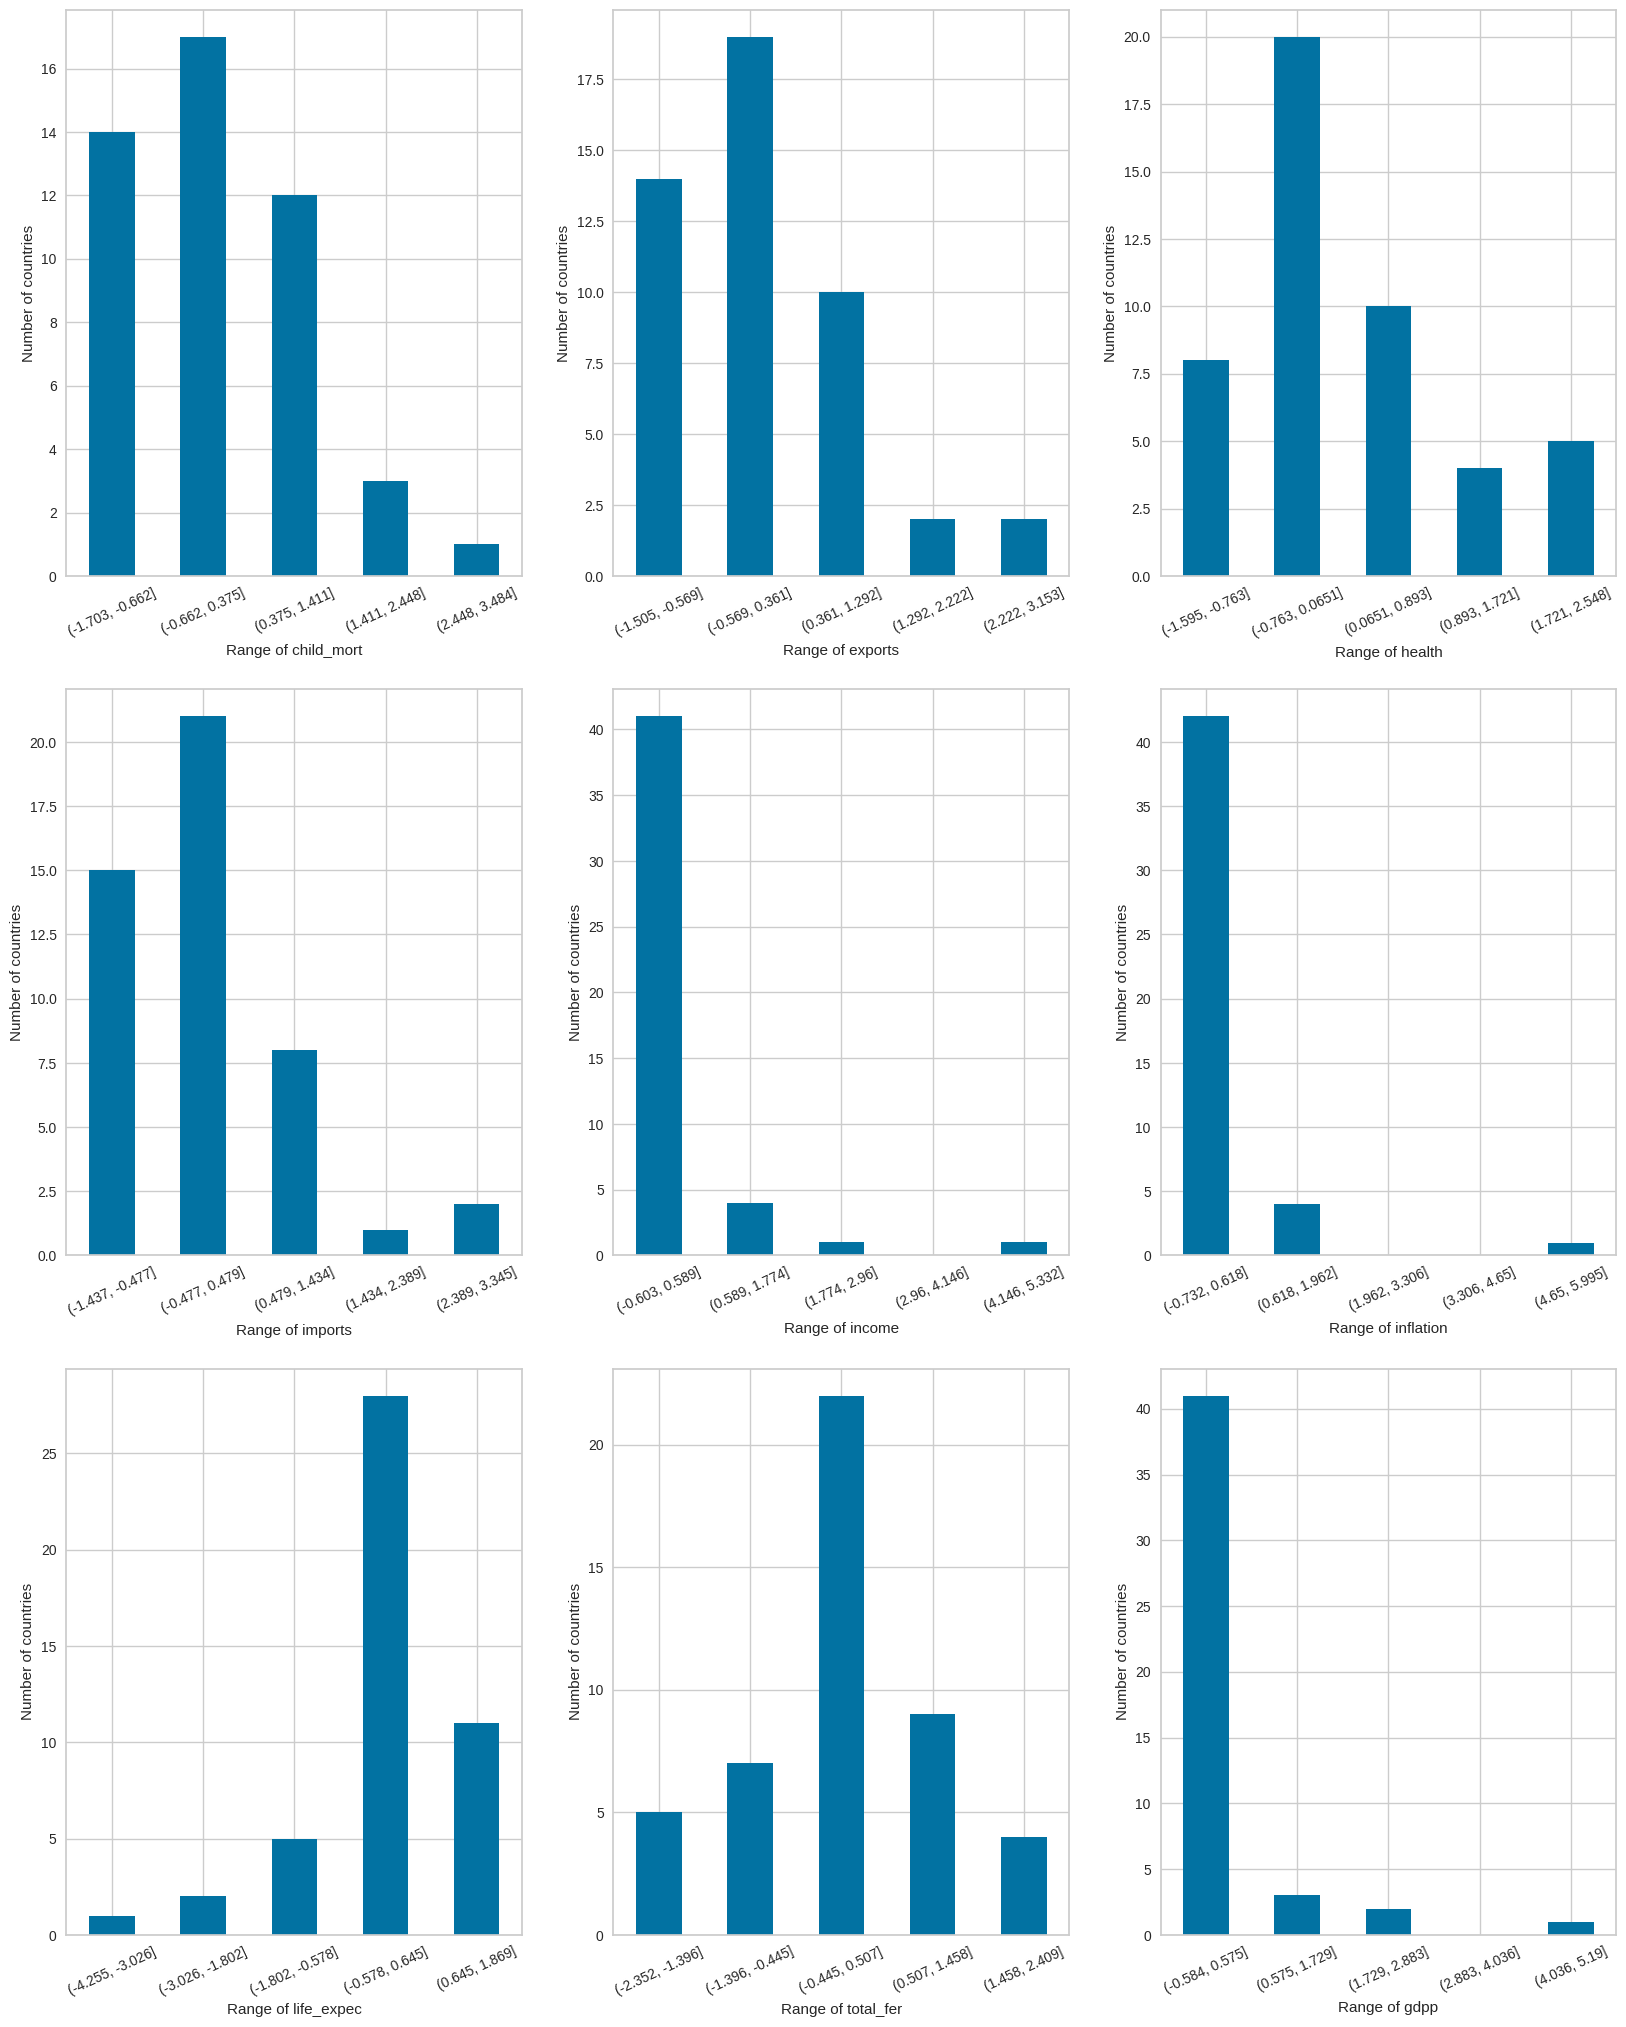

In [100]:
## Vizualize the scaled data

#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X_scale.columns[0:10]:
    temp = pd.cut(x = X_scale[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

### Selecting essential features using PCA

In [101]:
#Using pca to select essential features which we will use later to fit the models.
pca = PCA()
pca.fit(X_scale)

PCA()

In [102]:
#Calculating explained variance ratio of different features in dataset
expalined_variance_ratio=pca.explained_variance_ratio_

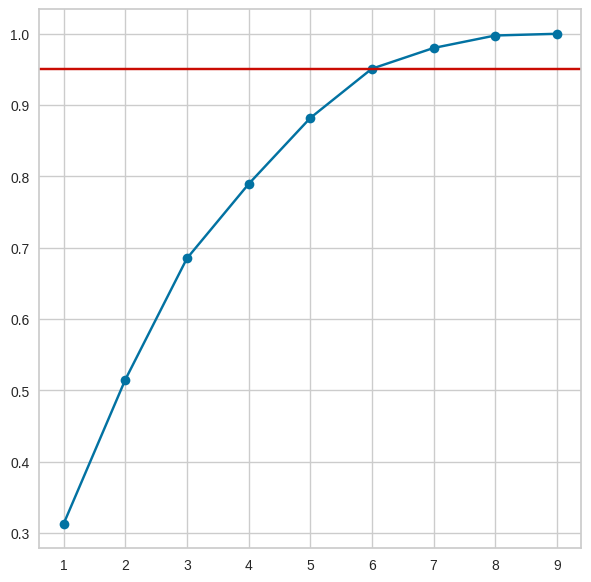

In [103]:
#Plotting the explained variance ratio to get n_components
cumulative_variance_ratio=np.cumsum(expalined_variance_ratio)
plt.plot(np.arange(1,10),cumulative_variance_ratio,marker='o')
plt.axhline(y=0.95,color='r')

From the plot, we can infer that for around 95% of variance, we should take n_components=5

### Transforming Data

In [104]:
#Transforming the dataset to n_components = 5 using pca
pca=PCA(n_components=6)
pca.fit(X_scale)
X_transform=pca.transform(X_scale)
X_transform=pd.DataFrame(X_transform,columns=["PC"+str(i) for i in np.arange(1,7)])
X_transform

PC1       PC2       PC3       PC4       PC5       PC6
0  -1.302733  0.004762 -0.091979  0.425416 -0.102925 -0.437463
1   1.289736 -0.682881  1.980881 -0.788506 -1.064939  0.165708
2  -0.652198 -0.576201  0.190565 -1.041240 -0.031035 -0.365704
3   2.616955  1.721926 -1.249671  0.449248  0.884492  0.126002
4  -1.206541 -0.500588  0.539372  0.007607  0.172736 -0.738831
5  -1.780291  0.009958 -0.313456  1.692221 -0.417050 -0.941987
6  -0.627260 -0.358706  0.287439 -0.673894  0.749200 -0.572690
7  -1.745483  0.263466  1.696256 -0.958056  1.611939 -0.507837
8  -0.926991 -0.147354  1.998997 -0.780286 -0.763598 -0.650751
9  -0.465225 -0.390106 -0.882448 -0.791882 -0.366404  0.260938
10 -0.847201 -0.054426  1.198168  0.558478 -1.358602  0.010131
11  2.298517 -0.073742  0.645441 -1.503723 -1.457627  1.360290
12  0.027076  0.365902  0.857533 -0.907128 -0.413253 -0.000319
13  7.384942  1.341262  2.467440  0.783174 -0.558807 -1.823091
14 -0.484545 -1.636994 -1.069934 -0.879643  1.163408  0.368262
15  3.865371 -0.732989  0.077021 -0.409083  1.039857 -0.510319
16 -0.515946 -0.832303 -0.650438 -0.453501 -0.782932 -0.341265
17  0.293714 -0.240697 -0.659000 -0.285955  0.051394  0.862394
18 -0.558395 -0.277040  0.676379 -0.377081 -0.167613  0.411649
19 -1.368870  0.420160  0.017720  0.310856  0.577122 -0.603507
20 -2.191125  4.022686  2.918062 -0.317353  2.274433  0.744860
21  2.241413 -0.539950 -1.518786  0.938110 -0.113335 -0.430821
22 -0.088024 -0.625875 -1.272287 -0.852976  0.510183  0.072737
23 -0.629294  2.084147 -2.217690  0.942427 -0.742306  0.391366
24  0.713753  0.273253 -1.082998 -0.949237  0.370555  1.216703
25 -0.481799  4.353204 -0.397849  0.482699 -0.715259  1.287487
26 -1.207257  2.188639 -1.238401  1.168211 -1.957724  0.326416
27 -0.156638 -0.526216 -0.832575 -0.993047  0.107947  0.649763
28 -0.957952 -0.016922  0.271836  0.000263  0.461312 -0.010643
29 -1.189676 -0.713243  1.273816 -0.531194 -0.415874 -0.967215
30  0.791582 -0.327787  0.044634 -0.632620 -1.571092  1.063750
31 -0.789594  0.187690  0.607292 -0.659860 -0.243720  0.059878
32  1.950427  1.506194 -1.065991 -0.355527 -0.083874  0.258832
33 -1.506934 -0.571445  1.238080 -0.526583 -1.413393 -1.137874
34  0.732798 -3.177306  3.079916  3.358565  0.626372  2.888462
35  0.137349 -1.497908 -0.600052 -1.086735  1.486819  0.436327
36 -0.857392 -0.261746 -1.997730  0.871493  0.337936 -0.550806
37 -0.198519 -0.559877 -1.067724 -0.605887 -0.283340 -0.200876
38 -1.896563  0.945445  0.910217  2.129472  0.423508 -0.605539
39  2.170441  1.300315 -1.389904  0.755187  2.307980 -0.469572
40  0.038432 -1.678052 -0.734681  0.410893  0.601238 -0.020456
41 -0.616573 -0.841122 -0.470545 -0.130348  0.302079 -0.308309
42 -0.293690 -2.095429 -1.197966  1.918725 -0.516545 -0.727437
43 -0.417496  0.952570 -0.410409 -0.400405 -0.811020  0.146067
44 -1.194327 -0.521737 -0.164557  0.824088 -0.004679 -0.872275
45  0.722479 -1.389783 -1.006566  0.068061 -0.126281  0.743840
46 -0.120452 -0.093156  0.606572 -0.203446  0.422715 -0.056276

### K_means clustering

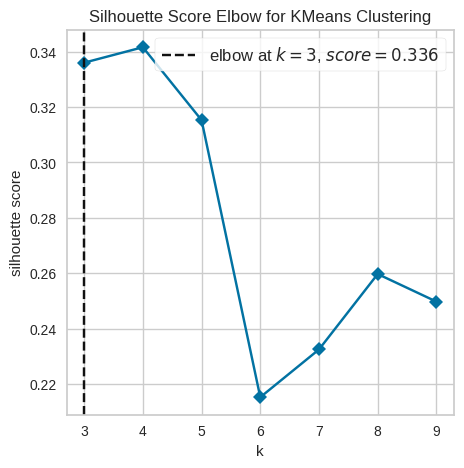

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [105]:
#Using elbow method to calculate optimal number of clusters
plt.rcParams['figure.figsize']=(5,5)
kmeans_clf = KMeans()

#elbow method by using Silhouette score
visualizer = KElbowVisualizer(kmeans_clf, k=(3,10),metric='silhouette',timings=False)
visualizer.fit(X_transform)
visualizer.show()

From the plots, we can infer that optimal number of cluster for KMeans is four

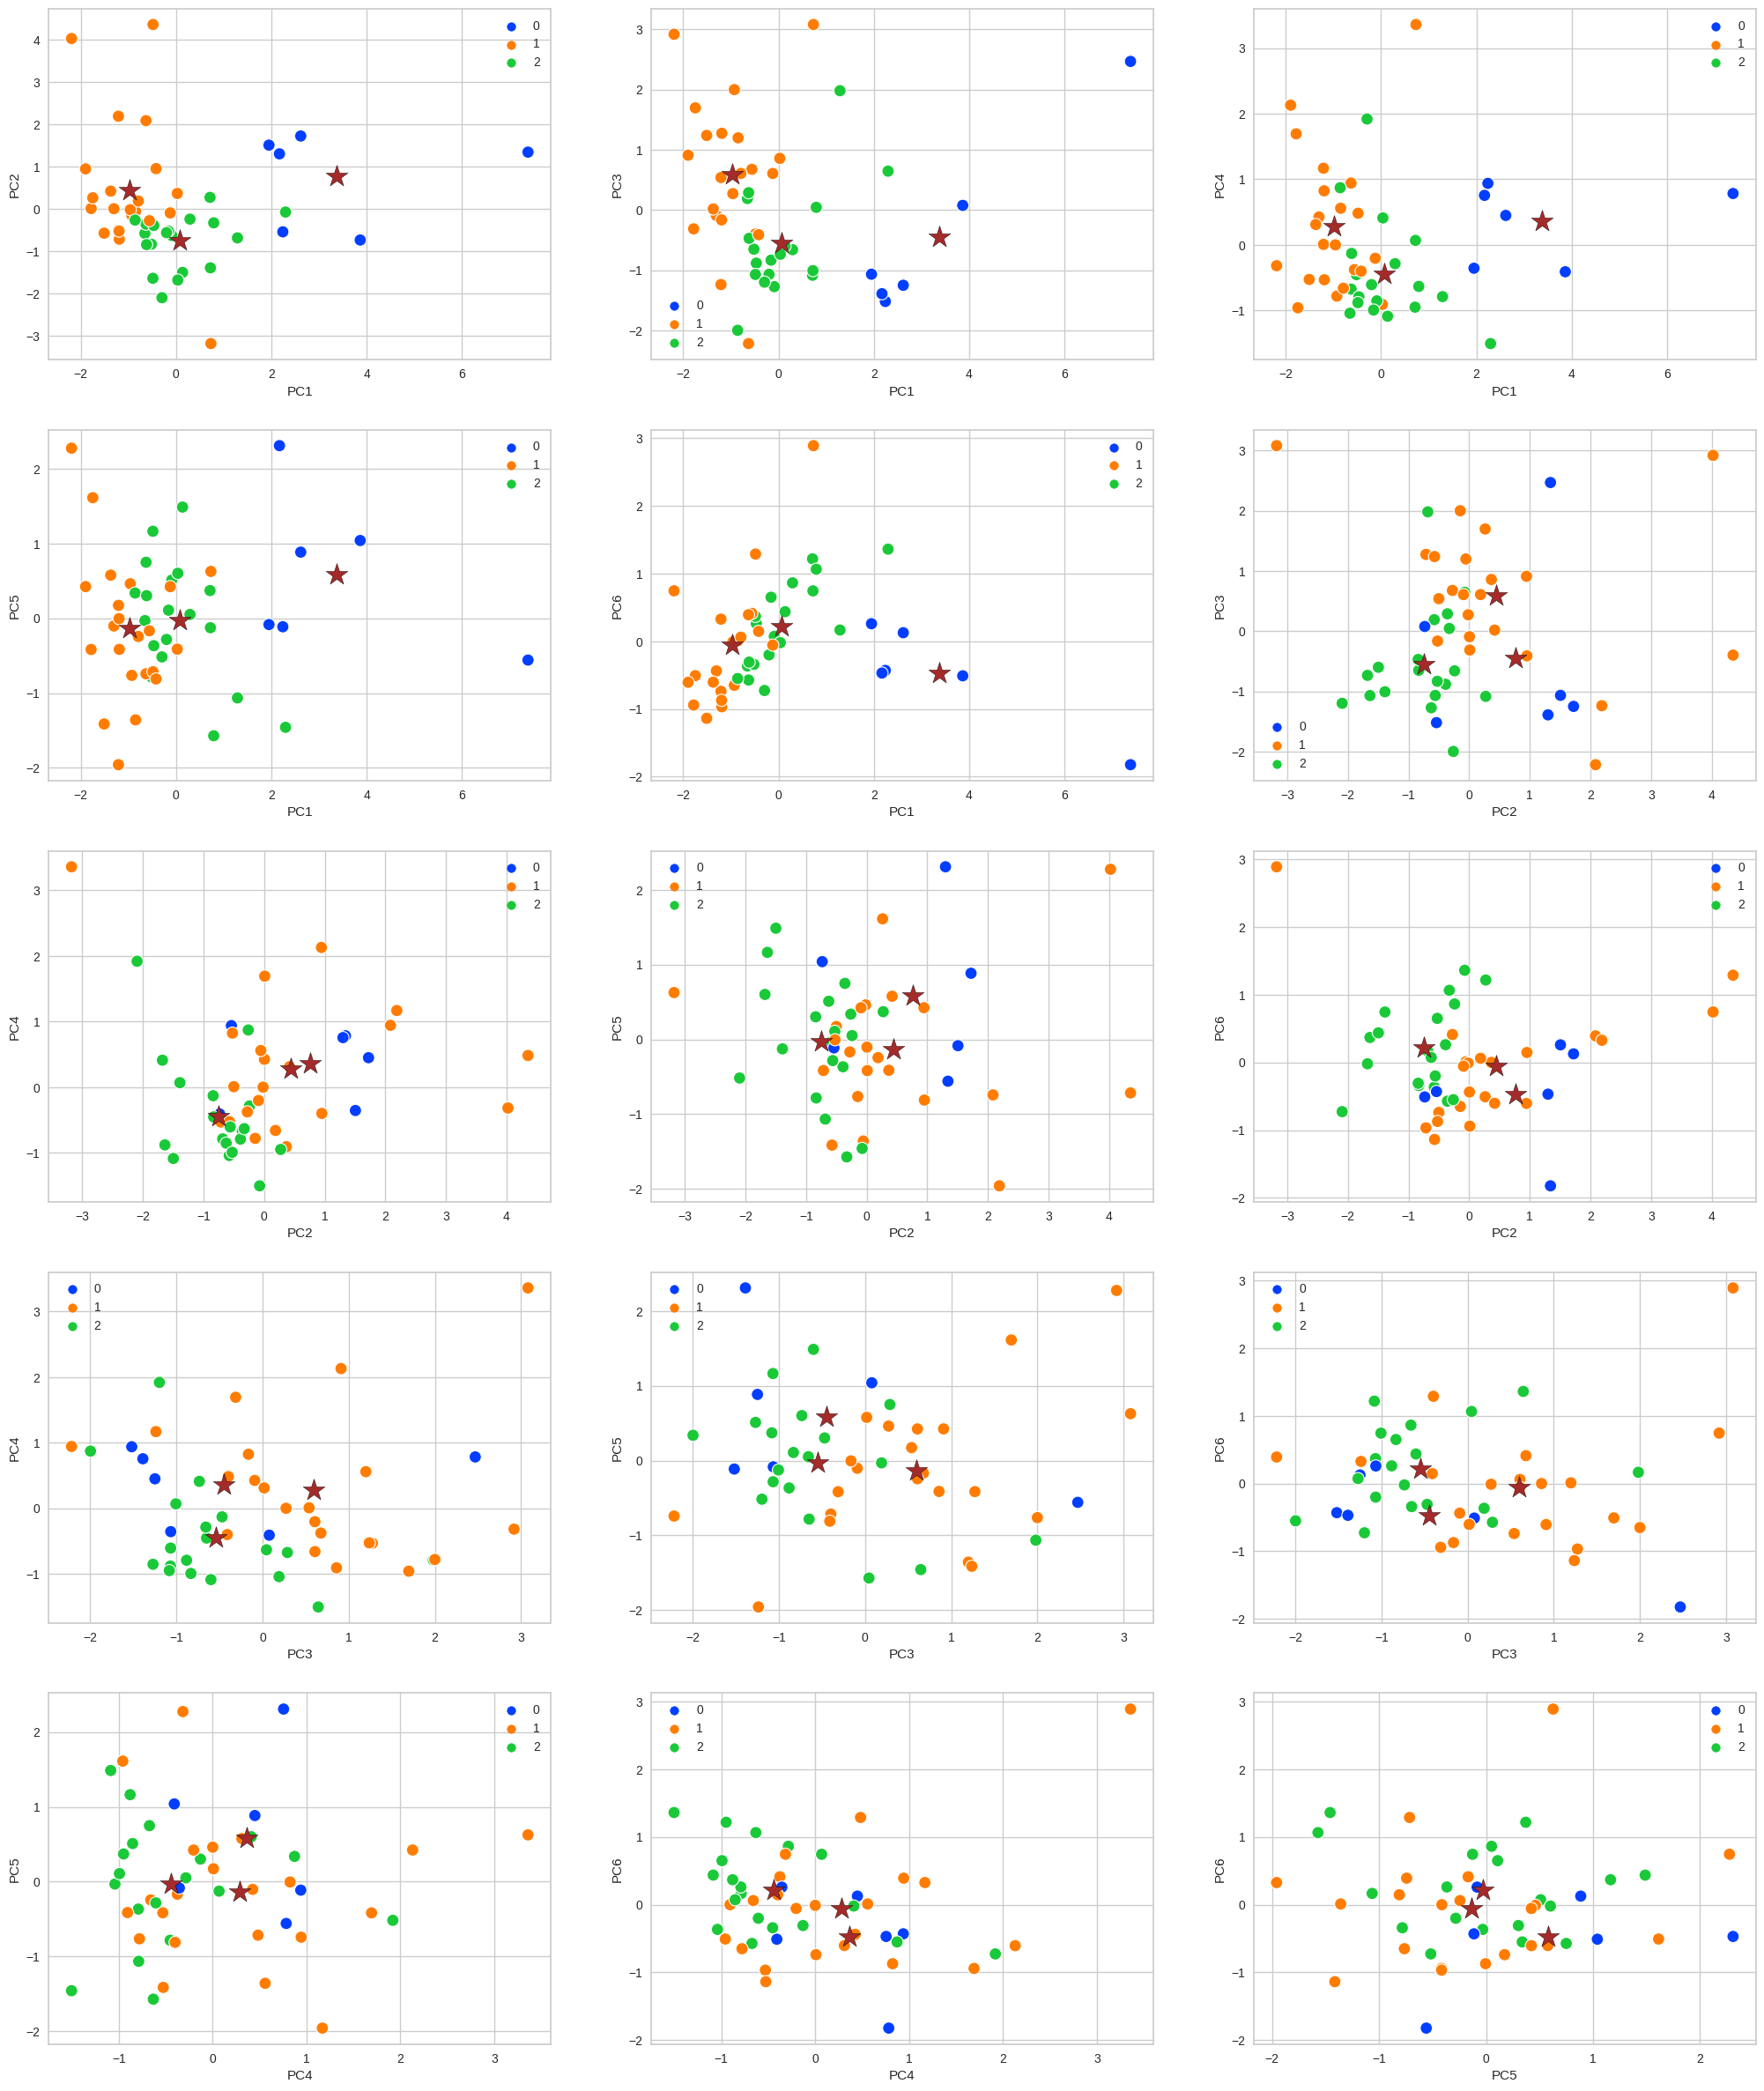

In [106]:
#Assigning cluster labels to datapoints using KMeans
models_kmeans = KMeans(n_clusters = 3)
clusters = models_kmeans.fit_predict(X_transform)

#Plotting the clusters with the datapoints and centroids
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns

#Centroids
centroids_kmeans = models_kmeans.cluster_centers_

for j in range(len(cols)):
  for k in range(j,len(cols)):
    #We do not want to plot for same feature vs same feature
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      #Plotting cluster
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = clusters,palette='bright',ax= ax,s = 100,alpha = 1)
      #PLotting centroids
      ax.scatter(centroids_kmeans[:,j],centroids_kmeans[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black')
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

From the plots, we can infer that PC1 and PC2 are seperating the clusters very effectively while other features are not performing well

In [107]:
#Storing the cluster labels we got from KMeans into a numpy array
country_labels_kmeans = models_kmeans.labels_
country_labels_kmeans

array([1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1,
       1, 2, 1], dtype=int32)

In [108]:
#Calculating percentage of points in each clusters
unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 6	12.77%
Class 1: 22	46.81%
Class 2: 19	40.43%



### Gaussian Clustering

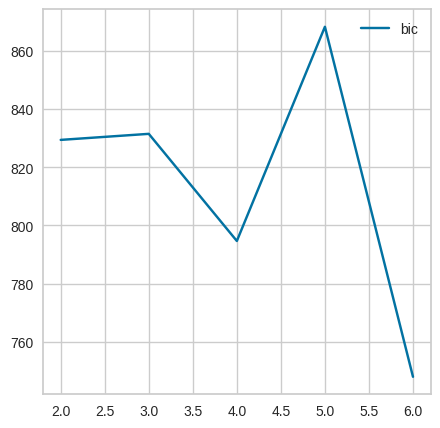

6

In [109]:
#Calculating optimal value for n_components for Gaussian mixture by minimizing the BIC(Bayessian information criterion)
bic = []
for n in range(2,7):
    temp = GaussianMixture(n_components=n)
    temp.fit(X_transform)
    bic.append(temp.bic(X_transform))
plt.plot(range(2,7),bic,label = 'bic')
plt.legend()
plt.show()
k = (bic.index(min(bic)) + 2)
k

So optimal value of n_components for Gaussian mixture is 5 same as KMeans model

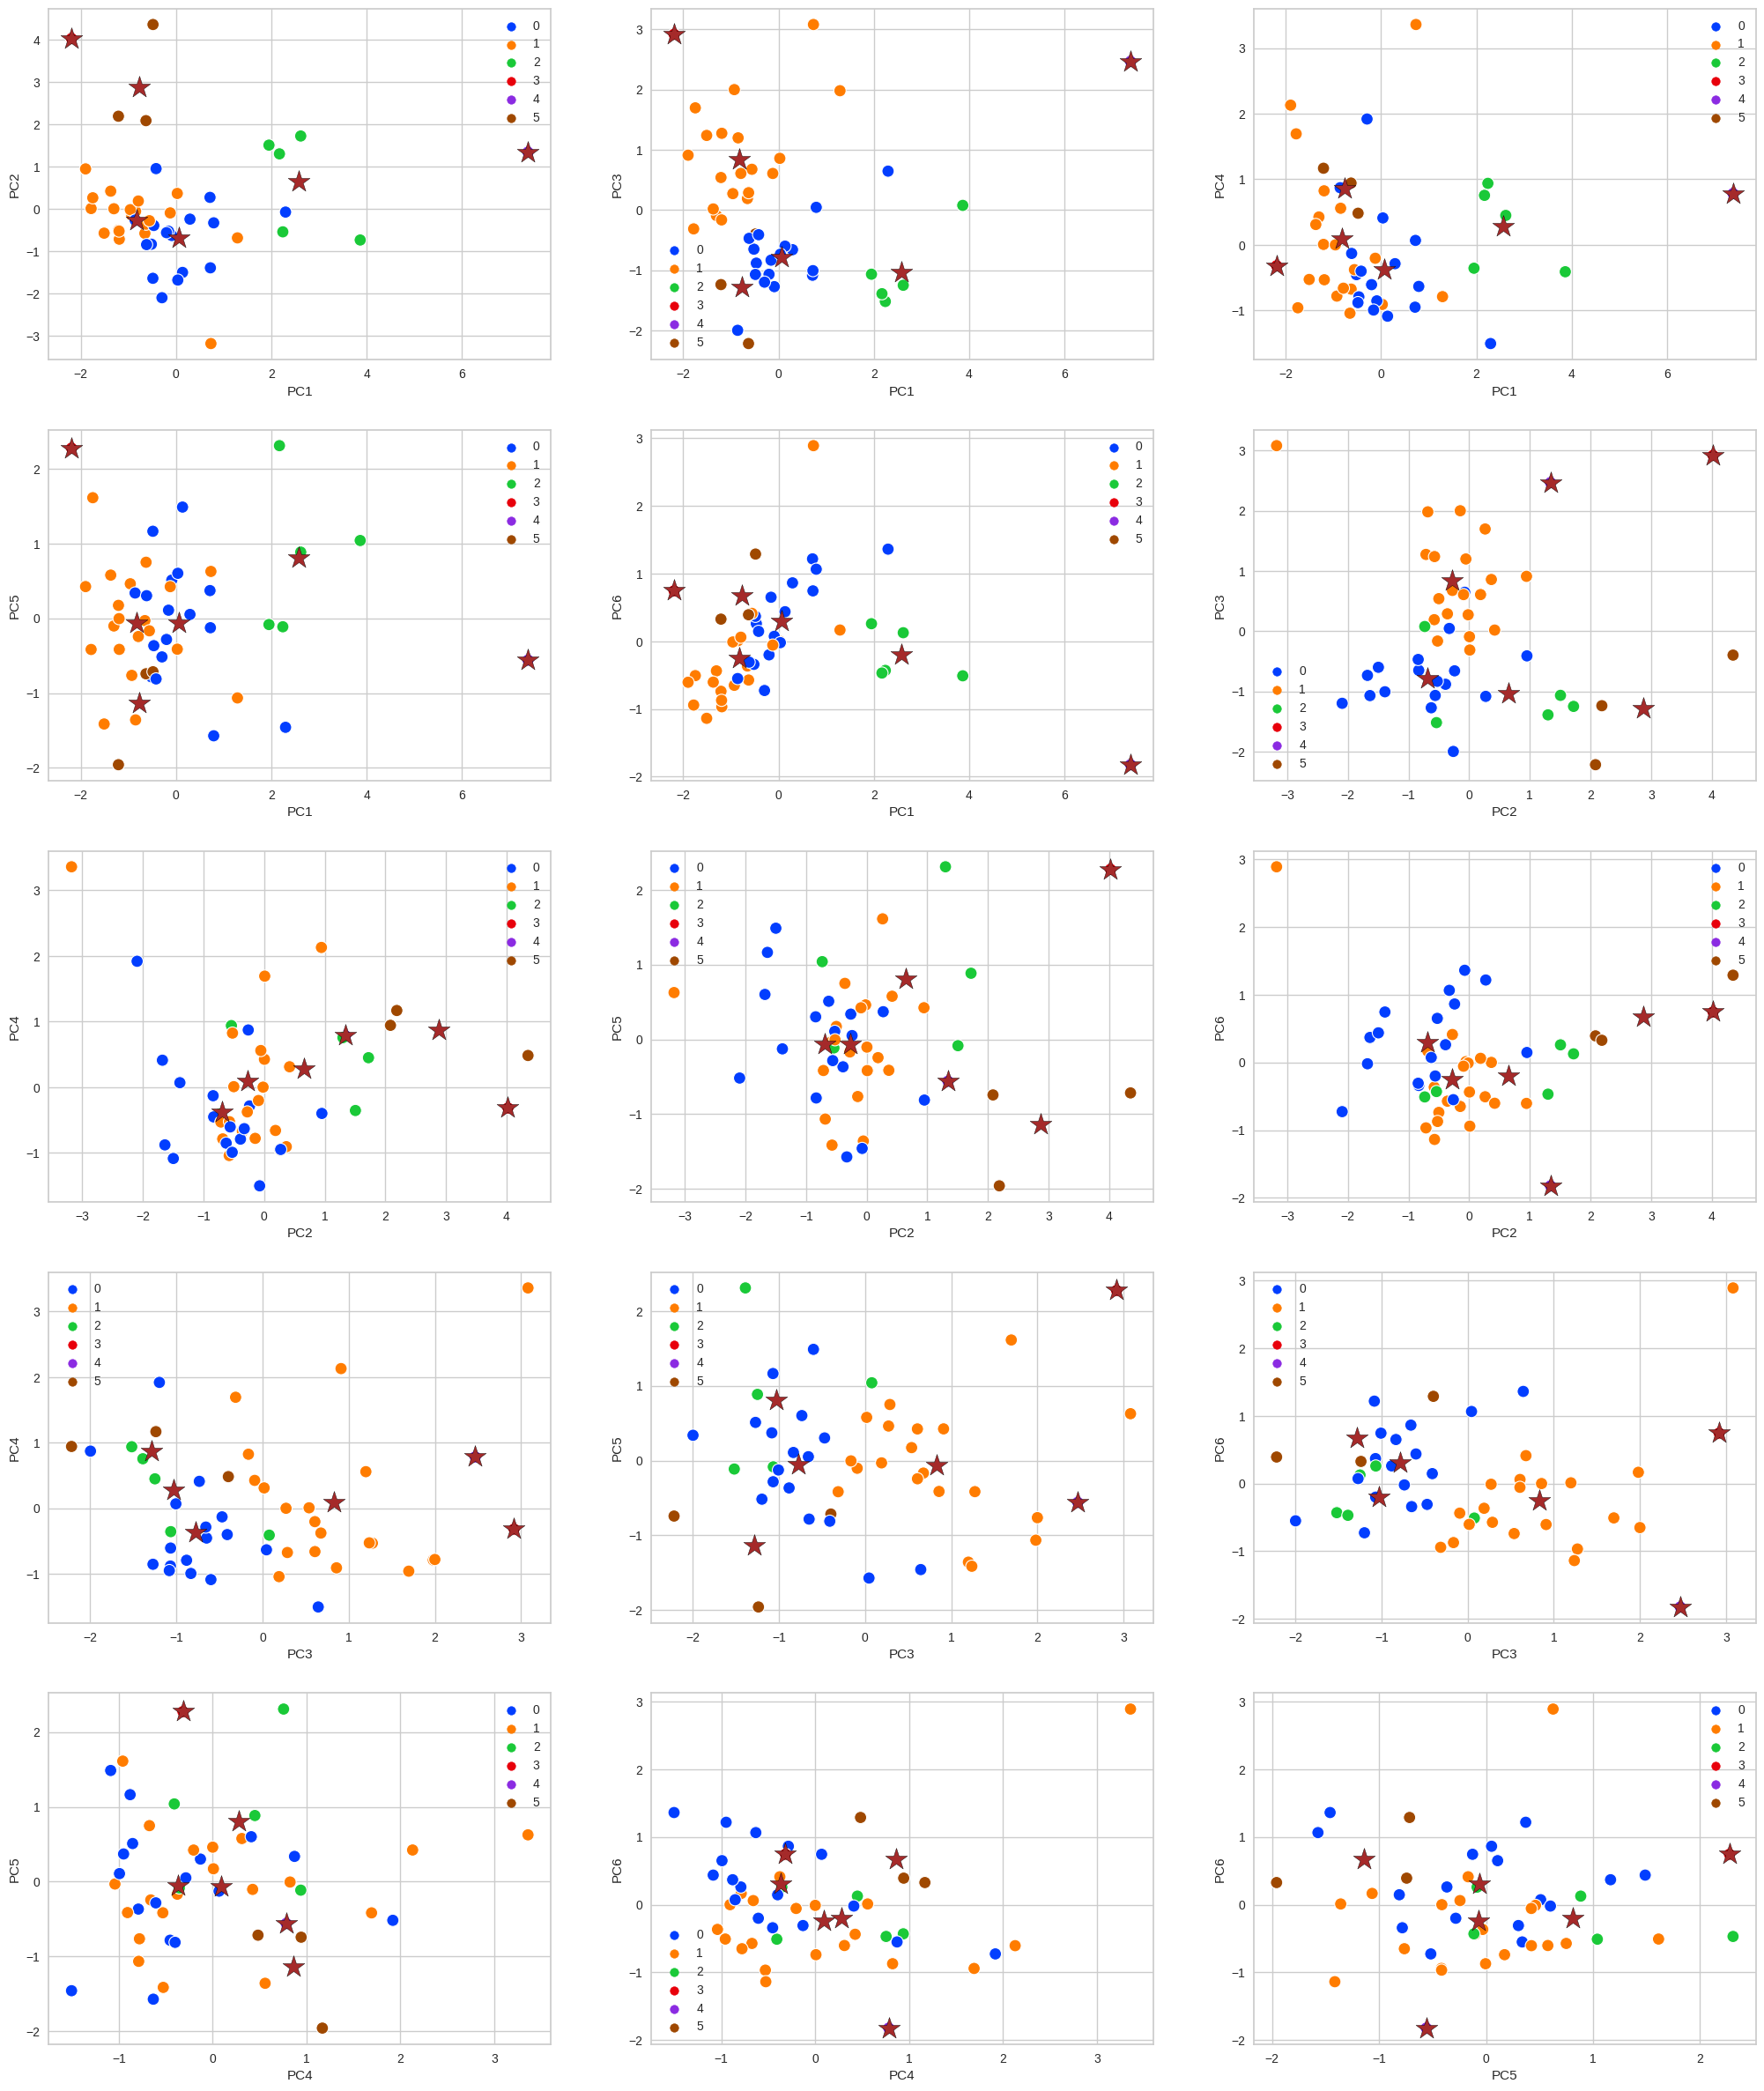

In [110]:
#Performing Gaussian mixture modelling on data with n_components = 4
gmm = GaussianMixture(n_components=k)
gmm.fit(X_transform)

country_labels_gaussian = gmm.predict(X_transform)
#Centroids
centroids_guassian = gmm.means_

#Plotting the clusters and centroids as done in KMeans part
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_gaussian,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_guassian[:,j],centroids_guassian[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [111]:
#Calculating percentage of datapoints in each cluster
unique_labels, counts = np.unique(country_labels_gaussian, return_counts=True)
percentages = counts / len(country_labels_gaussian) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 17	36.17%
Class 1: 20	42.55%
Class 2: 5	10.64%
Class 3: 1	2.13%
Class 4: 1	2.13%
Class 5: 3	6.38%



### Hierarchial Clustering

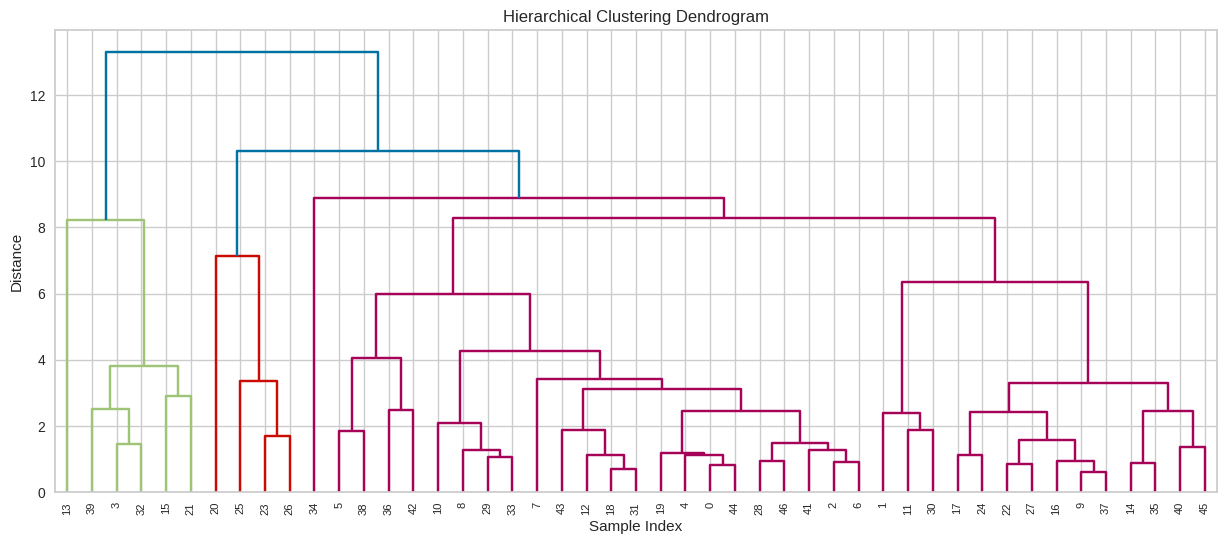

In [112]:
#Calculating optimal value of n_clusters for Agglomerative Clustering
Z = linkage(X_transform, method='ward', metric='euclidean')
#Plotting the dendrogram
plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

Optimal value of n_cluster for Agglomerative Clustering is 3

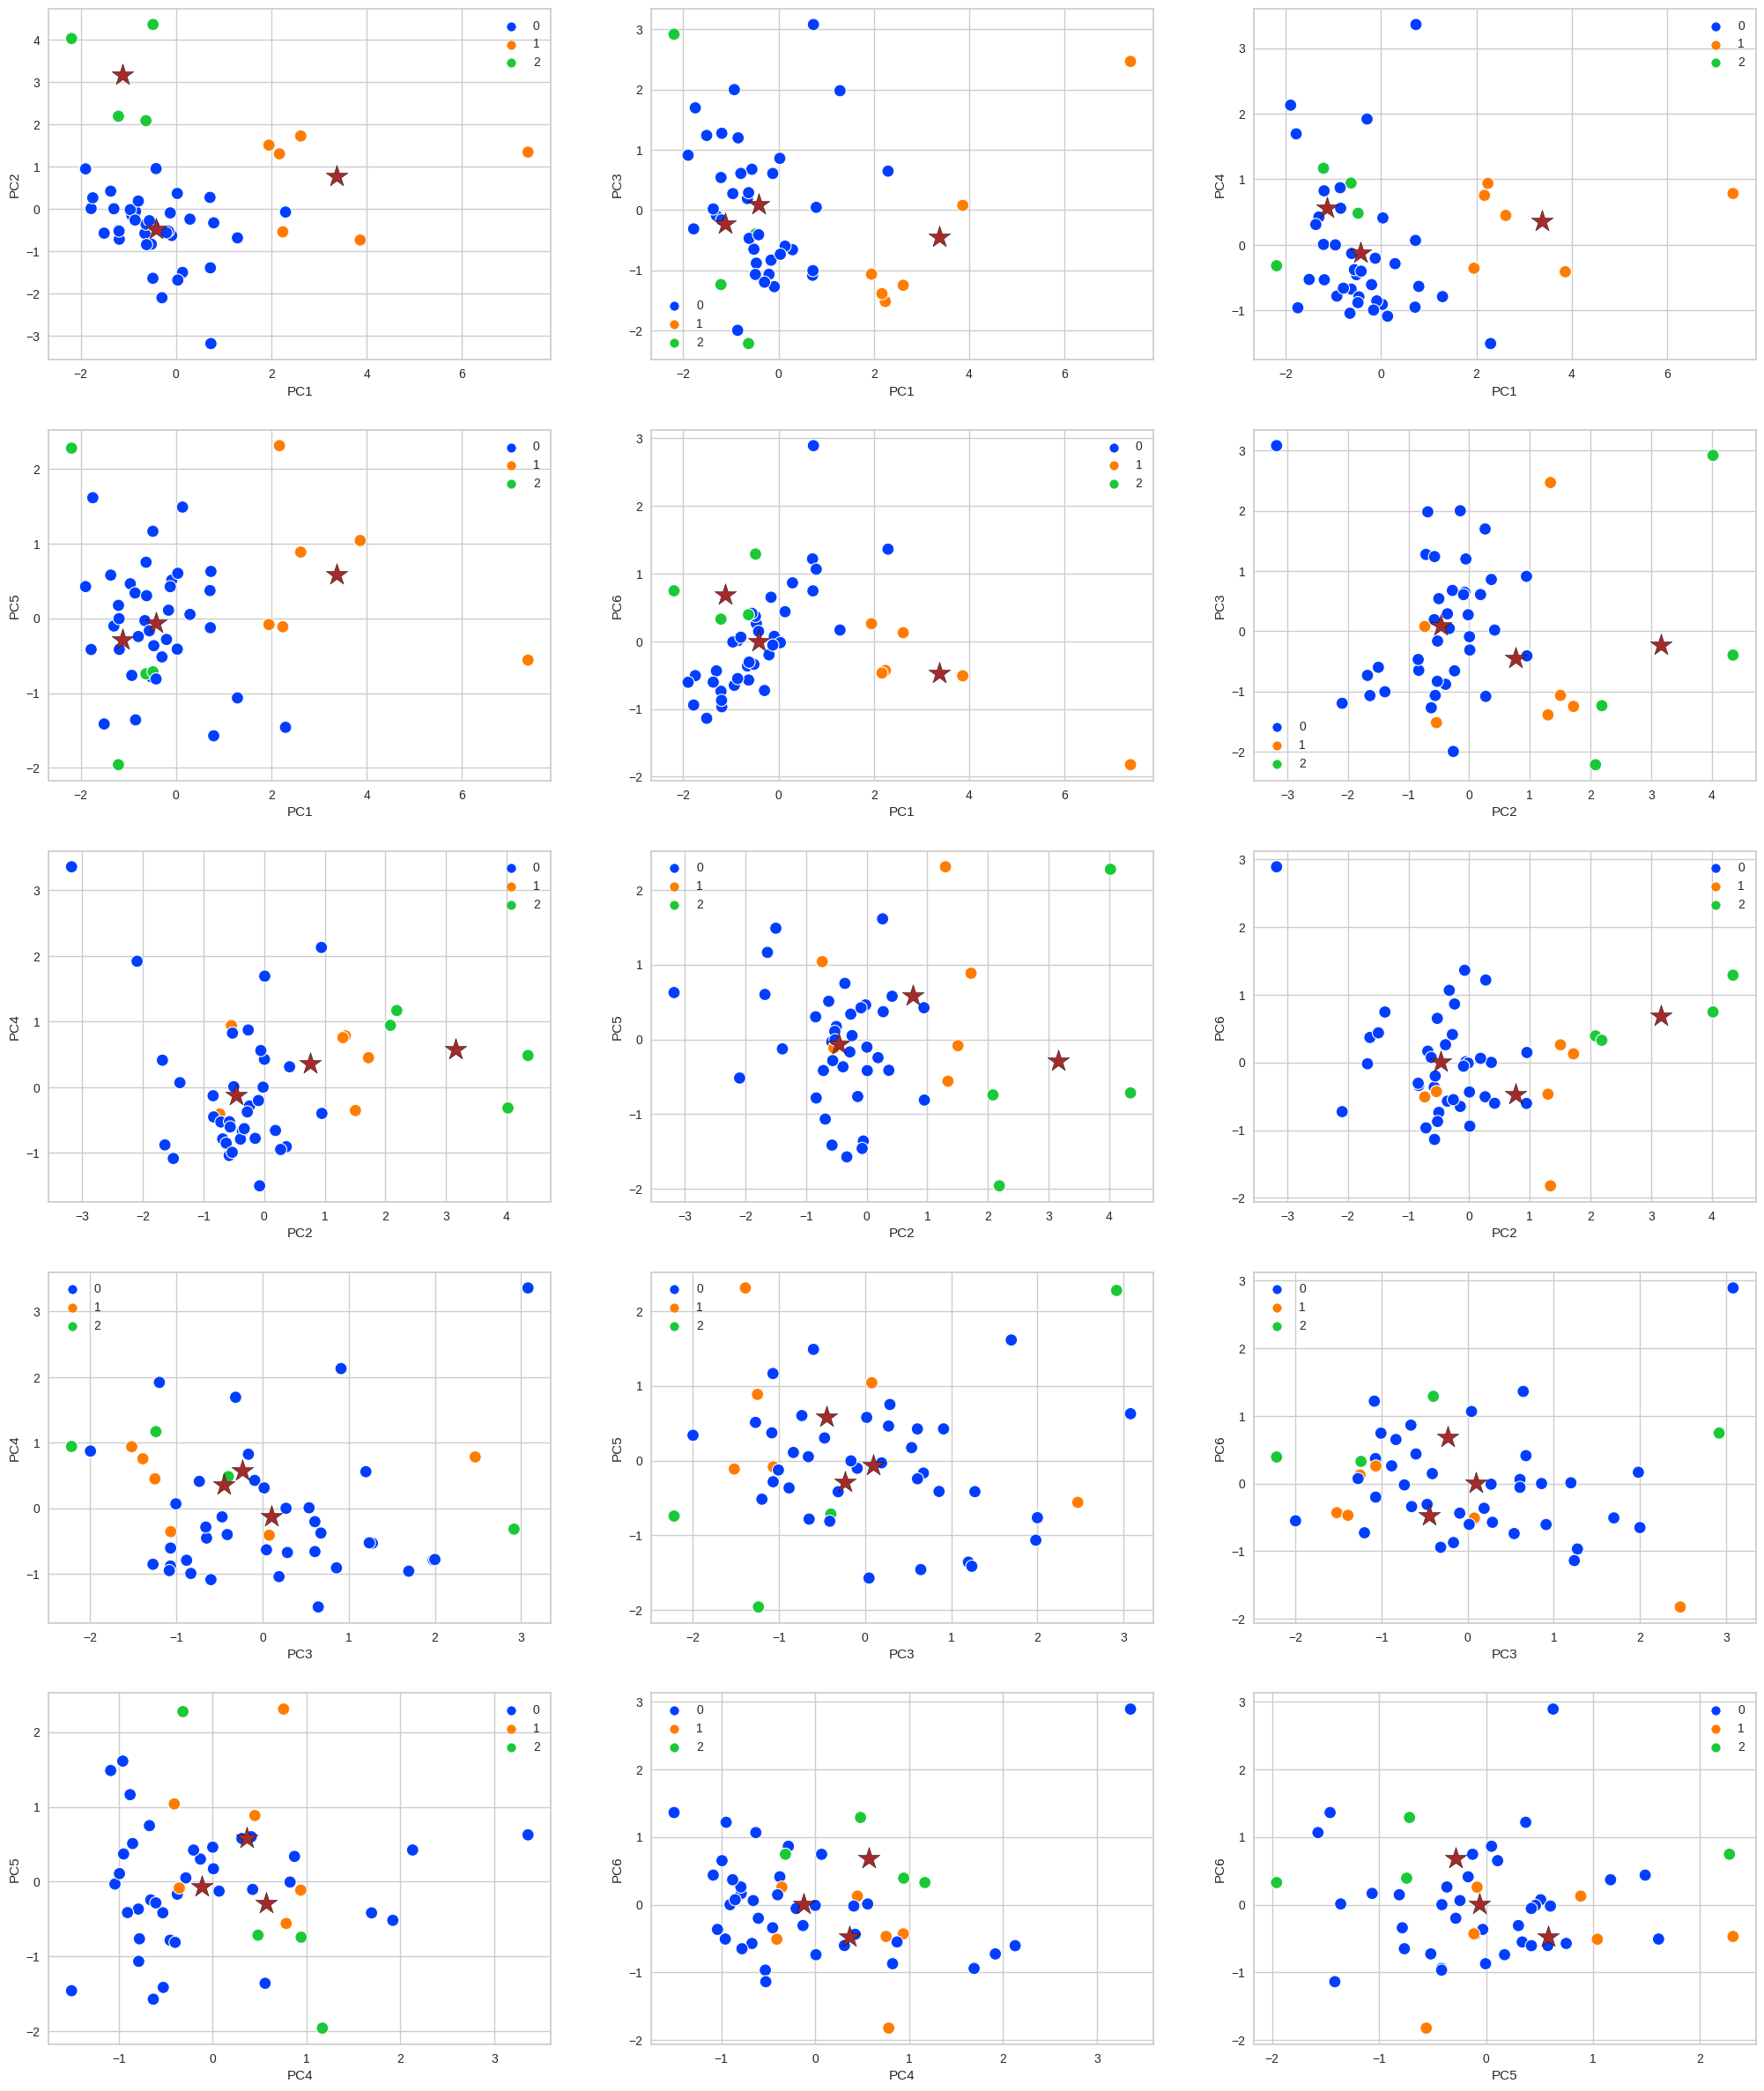

In [113]:
#Fitting Agglomerative Clustering model on data with n_clusters = 3
model_hir_agg = AgglomerativeClustering(n_clusters=3)
model_hir_agg.fit(X_transform)
country_labels_hir_agg = model_hir_agg.labels_

#Plotting the clusters
X_transform['country_labels_hir_agg']=country_labels_hir_agg
centroids_hir_agg=X_transform.groupby('country_labels_hir_agg').mean().values
X_transform.drop('country_labels_hir_agg',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_hir_agg,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_hir_agg[:,j],centroids_hir_agg[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [114]:
#Calculating percentage of datapoints in each cluster
unique_labels, counts = np.unique(country_labels_hir_agg, return_counts=True)
percentages = counts / len(country_labels_hir_agg) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 37	78.72%
Class 1: 6	12.77%
Class 2: 4	8.51%



### DBSCAN Clustering

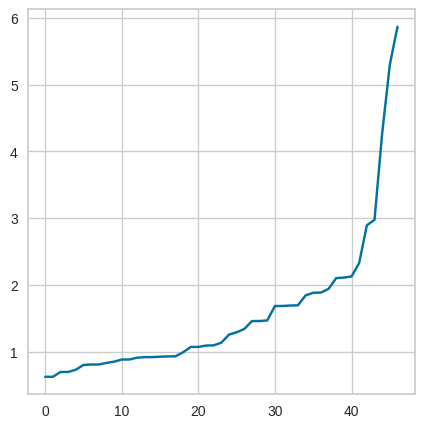

In [115]:
from sklearn.neighbors import NearestNeighbors
#Calculating optimal value for eps for DBSCAN algorithm on the given dataset
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transform)
distances, indices = nbrs.kneighbors(X_transform)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 5,5
plt.plot(distances)

By observing the plot, we can infer that we are getting elbow at around eps = 2

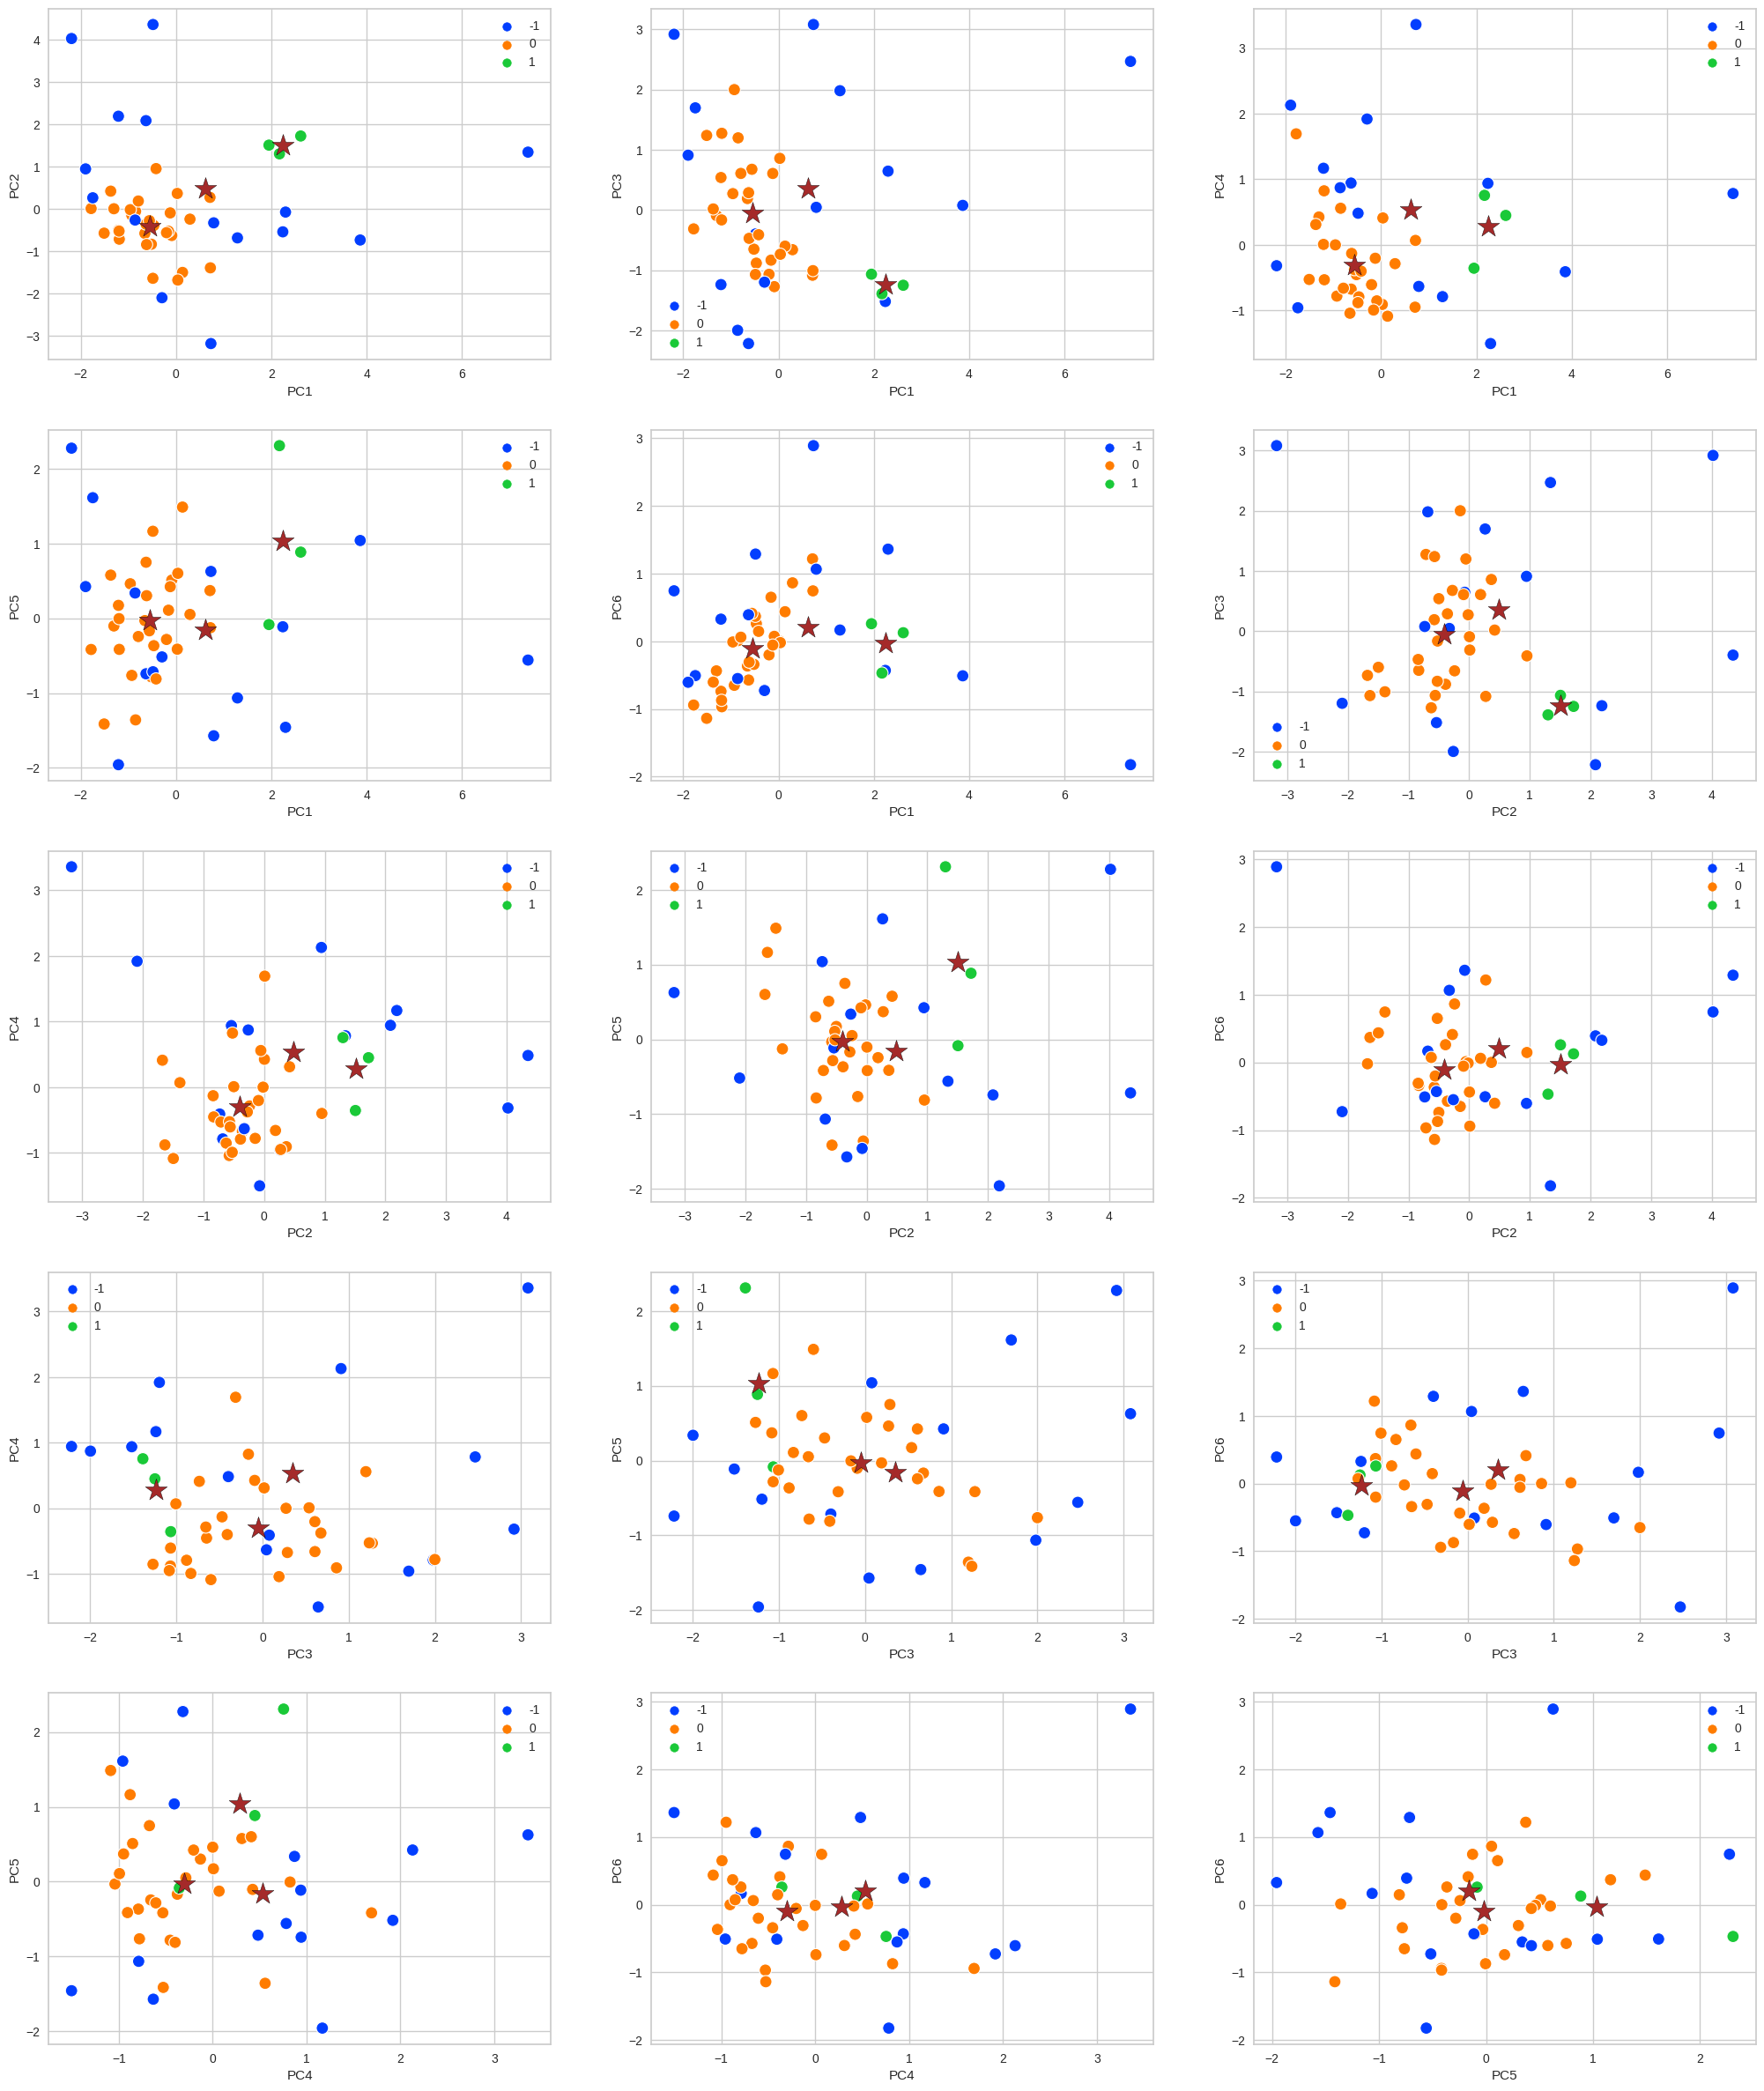

In [116]:
#Fitting a DBSCAN model on the dataset with eps = 1.5 and min_samples = 3
#Here we took min_samples = 3 by the observations from previous clusters where we are getting a cluster with only 3 samples
db = DBSCAN(eps = 1.8, min_samples = 3 )# minimum samples is set to 8
db.fit(X_transform)

#Storing the cluster labels that we got from DBSCAN
country_labels_dbscan = db.labels_

#PLotting the clusters
X_transform['country_labels_dbscan']=country_labels_dbscan
centroids_dbscan=X_transform.groupby('country_labels_dbscan').mean().values
X_transform.drop('country_labels_dbscan',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_dbscan,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_dbscan[:,j],centroids_dbscan[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

### Evaluating the Clustering

In [117]:
print("Gaussian",sscore(X_transform, country_labels_gaussian, metric='euclidean'))

print("KMeans",sscore(X_transform,country_labels_kmeans,metric = 'euclidean'))

print("alggomerative",sscore(X_transform,country_labels_hir_agg,metric = 'euclidean'))

print("Dbscan",sscore(X_transform,country_labels_dbscan,metric = 'euclidean'))

Gaussian 0.21882388381167545
KMeans 0.15455494211167753
alggomerative 0.3601544027088434
Dbscan 0.22315215063140725


In [118]:
country_labels_hir_agg

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [119]:
under_developed = country_label_df[country_label_df["labels"] == "Under Developed"]
under_developed = under_developed.reset_index().drop(["index" ,"labels"], axis = 1)
under_developed["labels"] = country_labels_hir_agg
under_developed

country  child_mort  exports  health  imports  income  \
0                Afghanistan        90.2    10.00    7.58     44.9    1610   
1                     Angola       119.0    62.30    2.85     42.9    5900   
2                      Benin       111.0    23.80    4.10     37.2    1820   
3                   Botswana        52.5    43.60    8.30     51.3   13300   
4               Burkina Faso       116.0    19.20    6.74     29.6    1430   
5                    Burundi        93.6     8.92   11.60     39.2     764   
6                   Cameroon       108.0    22.20    5.13     27.0    2660   
7   Central African Republic       149.0    11.80    3.98     26.5     888   
8                       Chad       150.0    36.80    4.53     43.5    1930   
9                    Comoros        88.2    16.50    4.51     51.7    1410   
10          Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
11               Congo, Rep.        63.9    85.10    2.46     54.7    5190   
12             Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
13         Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
14                   Eritrea        55.2     4.79    2.66     23.3    1420   
15                     Gabon        63.7    57.70    3.50     18.9   15400   
16                    Gambia        80.3    23.80    5.69     42.7    1660   
17                     Ghana        74.7    29.50    5.22     45.9    3060   
18                    Guinea       109.0    30.30    4.93     43.2    1190   
19             Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
20                     Haiti       208.0    15.30    6.91     64.7    1500   
21                      Iraq        36.9    39.40    8.41     34.1   12700   
22                     Kenya        62.2    20.70    4.75     33.6    2480   
23                  Kiribati        62.7    13.30   11.30     79.9    1730   
24                       Lao        78.9    35.40    4.47     49.3    3980   
25                   Lesotho        99.7    39.40   11.10    101.0    2380   
26                   Liberia        89.3    19.10   11.80     92.6     700   
27                Madagascar        62.2    25.00    3.77     43.0    1390   
28                    Malawi        90.5    22.80    6.59     34.9    1030   
29                      Mali       137.0    22.80    4.98     35.1    1870   
30                Mauritania        97.4    50.70    4.41     61.2    3320   
31                Mozambique       101.0    31.50    5.21     46.2     918   
32                   Namibia        56.0    47.80    6.78     60.7    8460   
33                     Niger       123.0    22.20    5.16     49.1     814   
34                   Nigeria       130.0    25.30    5.07     17.4    5150   
35                  Pakistan        92.1    13.50    2.20     19.4    4280   
36                    Rwanda        63.6    12.00   10.50     30.0    1350   
37                   Senegal        66.8    24.90    5.66     40.3    2180   
38              Sierra Leone       160.0    16.80   13.10     34.5    1220   
39              South Africa        53.7    28.60    8.94     27.4   12000   
40                     Sudan        76.7    19.70    6.32     17.2    3370   
41                  Tanzania        71.9    18.70    6.01     29.1    2090   
42               Timor-Leste        62.6     2.20    9.12     27.8    1850   
43                      Togo        90.3    40.20    7.65     57.3    1210   
44                    Uganda        81.0    17.10    9.01     28.6    1540   
45                     Yemen        56.3    30.00    5.18     34.4    4480   
46                    Zambia        83.1    37.00    5.89     30.9    3280   

    inflation  life_expec  total_fer   gdpp  labels  
0       9.440        56.2       5.82    553       0  
1      22.400        60.1       6.16   3530       0  
2       0.885        61.8       5.36    758       0  
3       8.920        57.1       2.88   6350       1  
4     

### Grouping the countries for dividing money


In [120]:
under_developed["child_mort"] = under_developed["child_mort"].astype(float)
group_df = under_developed.drop("country",axis = 1).groupby("labels").mean()
group_df["ratio"] = (group_df["exports"]/group_df["imports"])
group_df

child_mort    exports     health    imports        income  inflation  \
labels                                                                         
0        95.559459  26.489459   5.911892  37.829730   2254.675676  12.740676   
1        62.300000  50.483333   6.735000  41.883333  15926.666667  12.821667   
2       114.925000  21.775000  10.277500  84.550000   1577.500000   4.147500   

        life_expec  total_fer         gdpp     ratio  
labels                                                
0        60.018919   5.323514  1014.405405  0.700229  
1        60.166667   3.820000  8195.000000  1.205332  
2        50.025000   3.872500   912.250000  0.257540

In [121]:
value_counts=under_developed["labels"].value_counts()
value_counts

0    37
1     6
2     4
Name: labels, dtype: int64

In [122]:
#Calculating means of different clusters and sorting them in increasing order of gdpp
sorted_df_under_developed = under_developed.groupby('labels').mean().sort_values(by='gdpp')
sorted_df_under_developed

child_mort    exports     health    imports        income  inflation  \
labels                                                                         
2       114.925000  21.775000  10.277500  84.550000   1577.500000   4.147500   
0        95.559459  26.489459   5.911892  37.829730   2254.675676  12.740676   
1        62.300000  50.483333   6.735000  41.883333  15926.666667  12.821667   

        life_expec  total_fer         gdpp  
labels                                      
2        50.025000   3.872500   912.250000  
0        60.018919   5.323514  1014.405405  
1        60.166667   3.820000  8195.000000

In [123]:
#Merging label 

# Get the GDP values for each label
gdp_values = under_developed.groupby("labels")["gdpp"].mean()

# Get the two smallest GDP values
smallest_gdp = gdp_values.nsmallest(2)
smallest_labels = smallest_gdp.index.tolist()

# Merge the two smallest labels into a new label called "Severely Underdeveloped"
under_developed.loc[under_developed["labels"].isin(smallest_labels), "labels"] = "Severely Underdeveloped"

# Get the label with the highest GDP value
highest_label = gdp_values.idxmax()

# Rename the highest GDP value label as "Moderately Underdeveloped"
under_developed.loc[under_developed["labels"] == highest_label, "labels"] = "Moderately Underdeveloped"

In [124]:
sorted_df_under_developed = under_developed.groupby('labels').mean().sort_values(by='gdpp')
sorted_df_under_developed

child_mort    exports    health    imports  \
labels                                                                  
Severely Underdeveloped      97.44878  26.029512  6.337805  42.387805   
Moderately Underdeveloped    62.30000  50.483333  6.735000  41.883333   

                                 income  inflation  life_expec  total_fer  \
labels                                                                      
Severely Underdeveloped     2188.609756  11.902317   59.043902   5.181951   
Moderately Underdeveloped  15926.666667  12.821667   60.166667   3.820000   

                                  gdpp  
labels                                  
Severely Underdeveloped    1004.439024  
Moderately Underdeveloped  8195.000000

On the basis of mean data we got in previous part, we can say that countries lying in 

In [125]:
cnt_0_2= value_counts[0]+value_counts[2]
cnt_1=value_counts[1]
b=cnt_0_2*3+cnt_1
c=-10000000
x= np.roots([b, c])[0]
x=round(x,0)
print(3*x,'$ can be given to the low level under developed countries individually')
print(x, ' $  can be given to the high level under developed countries individually')

232557.0 $ can be given to the low level under developed countries individually
77519.0  $  can be given to the high level under developed countries individually


### Plotting World Map according to the money

In [126]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [127]:
#Printing the name of countries in different clusters
for label in (np.unique(under_developed['labels'])):
    print(label)
    print(under_developed[under_developed['labels']==label].values[:,0])
    print('\n')

Moderately Underdeveloped
['Botswana' 'Equatorial Guinea' 'Gabon' 'Iraq' 'Namibia' 'South Africa']


Severely Underdeveloped
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Eritrea' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati' 'Lao' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Sudan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']




In [128]:
from_country = under_developed['country']
to_country = world['name']

similarity_score_under_developed=[]
map_list_under_developed=[]

# Mapping function
def map_country_names(name):
    max_similarity = 0
    best_match = None
    for country_name in to_country:
        similarity = embed([name.lower()]).numpy().dot(embed([country_name.lower()]).numpy().T)
        if similarity > max_similarity:
            best_match = country_name
            max_similarity = similarity
    similarity_score_under_developed.append(max_similarity)
    return best_match

#Map from_country to to_country
map_dict_country_under_developed={}
for name in from_country:
    mapped_name = map_country_names(name)
    map_dict_country_under_developed[name]=mapped_name
    map_list_under_developed.append(mapped_name)

In [129]:
map_dict_country_under_developed

{'Afghanistan': 'Afghanistan',
 'Angola': 'Angola',
 'Benin': 'Benin',
 'Botswana': 'Botswana',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cameroon': 'Cameroon',
 'Central African Republic': 'Central African Rep.',
 'Chad': 'Chad',
 'Comoros': 'Nicaragua',
 'Congo, Dem. Rep.': 'Dem. Rep. Congo',
 'Congo, Rep.': 'Dem. Rep. Congo',
 "Cote d'Ivoire": "Côte d'Ivoire",
 'Equatorial Guinea': 'Guinea',
 'Eritrea': 'Eritrea',
 'Gabon': 'Gabon',
 'Gambia': 'Gambia',
 'Ghana': 'Ghana',
 'Guinea': 'Guinea',
 'Guinea-Bissau': 'Guinea-Bissau',
 'Haiti': 'Haiti',
 'Iraq': 'Iraq',
 'Kenya': 'Kenya',
 'Kiribati': 'Qatar',
 'Lao': 'Sri Lanka',
 'Lesotho': 'Lesotho',
 'Liberia': 'Liberia',
 'Madagascar': 'Madagascar',
 'Malawi': 'Malawi',
 'Mali': 'Mali',
 'Mauritania': 'Mauritania',
 'Mozambique': 'Mozambique',
 'Namibia': 'Namibia',
 'Niger': 'Niger',
 'Nigeria': 'Nigeria',
 'Pakistan': 'Pakistan',
 'Rwanda': 'Rwanda',
 'Senegal': 'Senegal',
 'Sierra Leone': 'Sierra Leone',
 'South Afri

In [130]:
#GloVe mapped
cnt=0
for i in map_dict_country_under_developed:
    if(map_dict_country_under_developed[i]!=i):
        print(i,'<-->',map_dict_country_under_developed[i])
        cnt+=1

print("Total not exact matches :",cnt)

Central African Republic <--> Central African Rep.
Comoros <--> Nicaragua
Congo, Dem. Rep. <--> Dem. Rep. Congo
Congo, Rep. <--> Dem. Rep. Congo
Cote d'Ivoire <--> Côte d'Ivoire
Equatorial Guinea <--> Guinea
Kiribati <--> Qatar
Lao <--> Sri Lanka
Total not exact matches : 8


In [131]:
flattened_score_similarity_under_developed = np.concatenate(similarity_score_under_developed).flatten()
np.sum(flattened_score_similarity_under_developed<0.6)

3

In [132]:
#incorrect mapping by similarity score
arr=[]
for i,value in enumerate(flattened_score_similarity_under_developed):
    if(value<0.6):
        arr.append(from_country[i]+'<-->'+map_list[i])

print(arr)

['Comoros<-->Azerbaijan', 'Kiribati<-->Brunei', 'Lao<-->Bulgaria']


In [133]:
# HAND MAPPING incorrect classified one
incorrect_under_developed=['Comoros','Kiribati','Lao']

len(incorrect_under_developed)

3

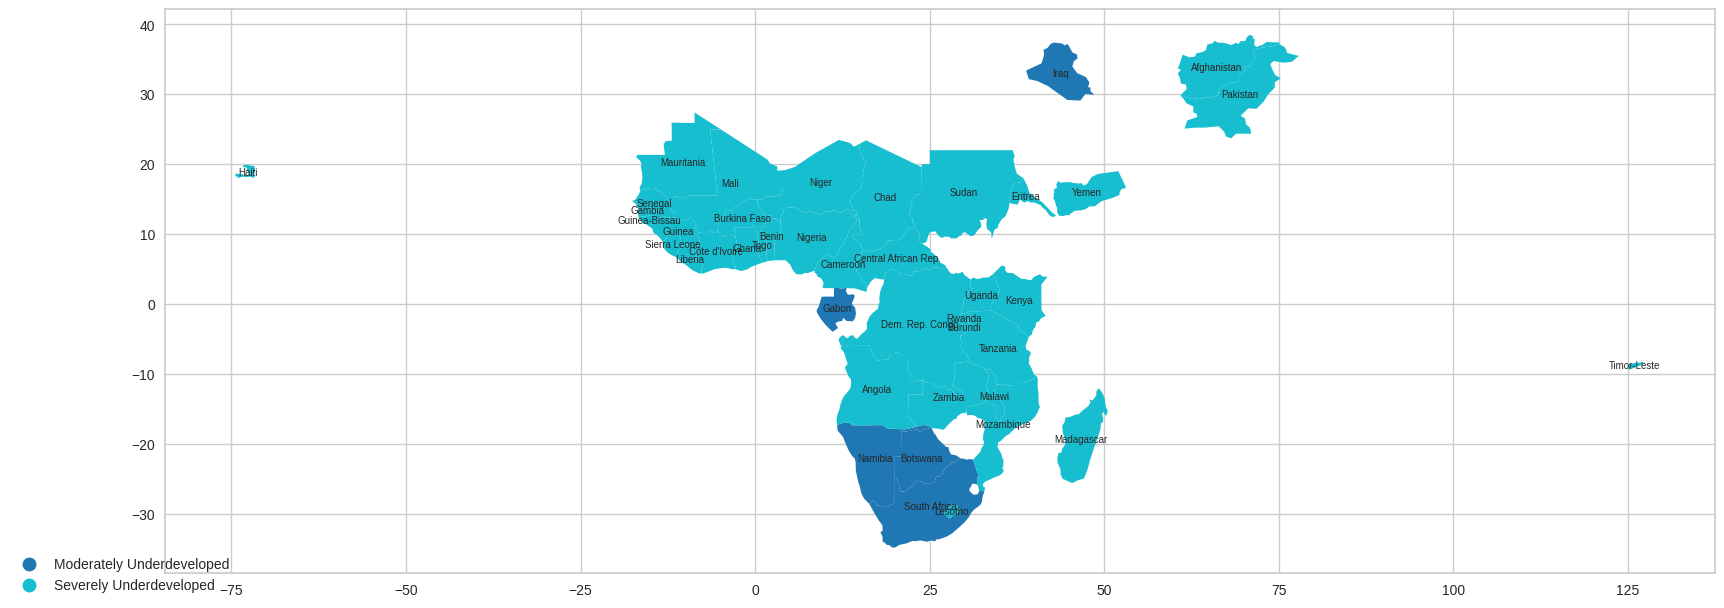

In [134]:
import matplotlib as mpl

map_cmap={'Severely Underdeveloped':0,'Moderately Underdeveloped':1}
label_colors_under_developed = {}
map_cntry_to_label_under_developed = {}

for label in (np.unique(under_developed['labels'])):
    for i in under_developed[under_developed['labels'] == label].values[:,0]:
        if i not in incorrect_under_developed:
            map_cntry_to_label_under_developed[map_dict_country_under_developed[i]] = label
            label_colors_under_developed[label] = mpl.colors.to_hex(mpl.cm.get_cmap('tab10')(map_cmap[label]))

for name in world['name']:
    if name not in map_dict_country_under_developed.values():
        map_cntry_to_label[name] = 'Not in dataset or in world_map'
        label_colors['Not in dataset or in world_map'] = '#cccccc'

world['color'] = world['name'].map(map_cntry_to_label_under_developed)

# create the plot
fig, ax = plt.subplots(figsize=(20, 22))
world.plot(column='color', ax=ax, legend=True)

# Add country names to the plot
for idx, row in world.iterrows():
    if row['name'] in map_cntry_to_label_under_developed.keys() and row['name'] not in incorrect_under_developed:
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], ha='center', va='center', fontsize=7)

legend = ax.get_legend()
legend.set_bbox_to_anchor((0.05, 0.05))